In [2]:
import pandas as pd

finance_data = pd.read_csv('C:/Users/User/OneDrive - Asia Pacific University/UM Datathon/UM Datathon/UM_datathon_2024.csv')

In [ ]:
finance_data.info()

In [4]:
finance_data.fillna(method='ffill', inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_12680\3202250230.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  finance_data.fillna(method='ffill', inplace=True)


In [5]:
finance_data['time'] = pd.to_datetime(finance_data['time'])

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = finance_data.select_dtypes(include=['float64', 'int64']).columns
finance_data[numeric_cols] = scaler.fit_transform(finance_data[numeric_cols])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(finance_data.corr(), annot=True, cmap='coolwarm')
plt.show()

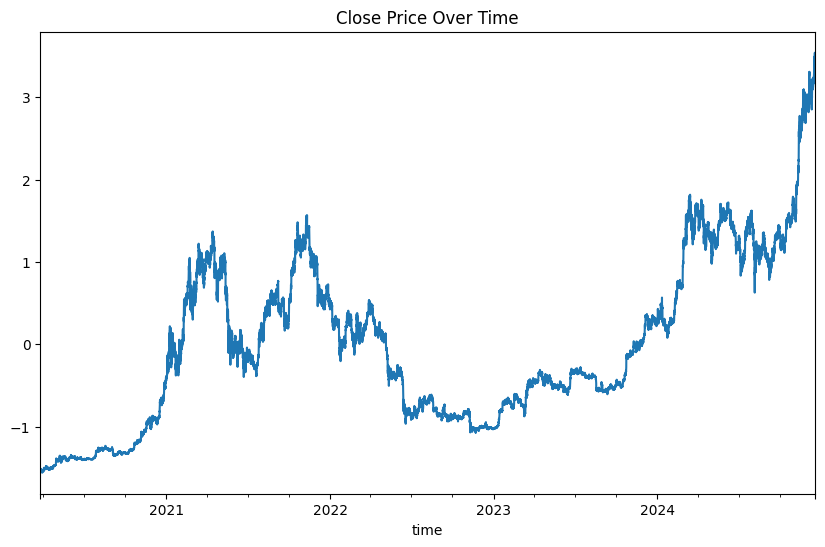

In [11]:
finance_data.set_index('time')['close_price'].plot(figsize=(10, 6), title='Close Price Over Time')
plt.show()

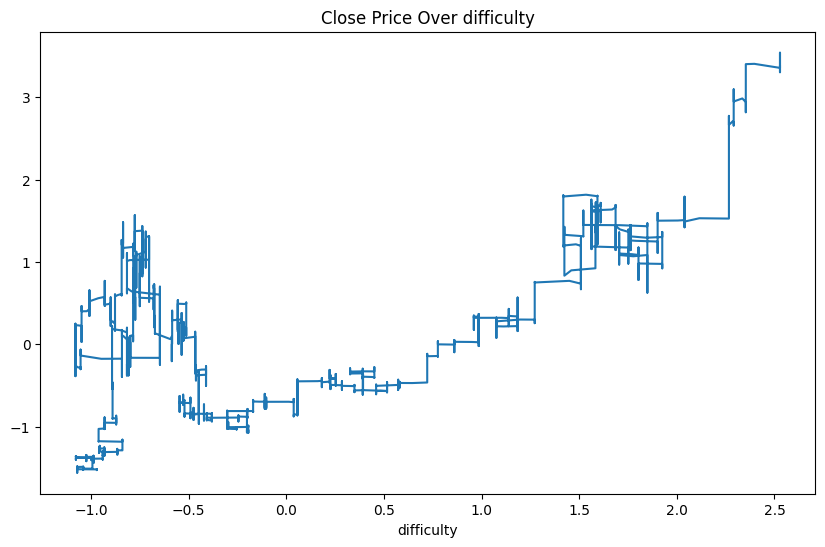

In [73]:
finance_data.set_index('difficulty')['close_price'].plot(figsize=(10, 6), title='Close Price Over difficulty')
plt.show()

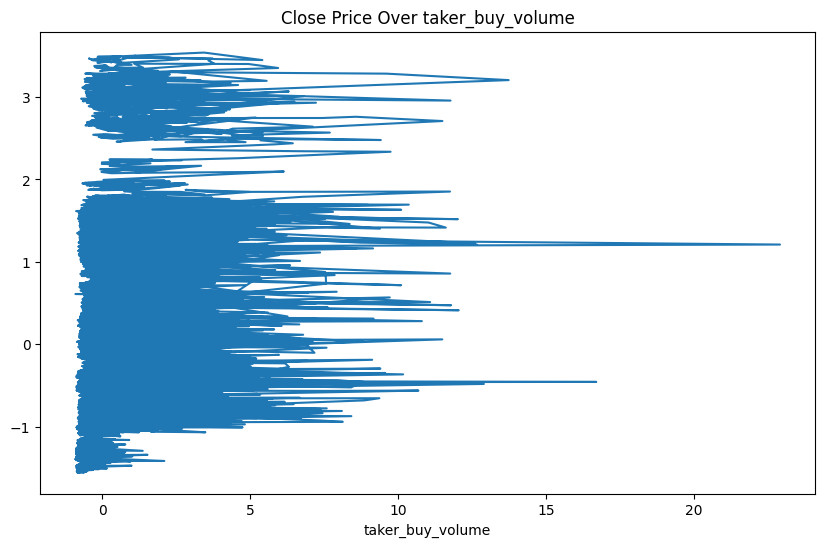

In [74]:
finance_data.set_index('taker_buy_volume')['close_price'].plot(figsize=(10, 6), title='Close Price Over taker_buy_volume')
plt.show()

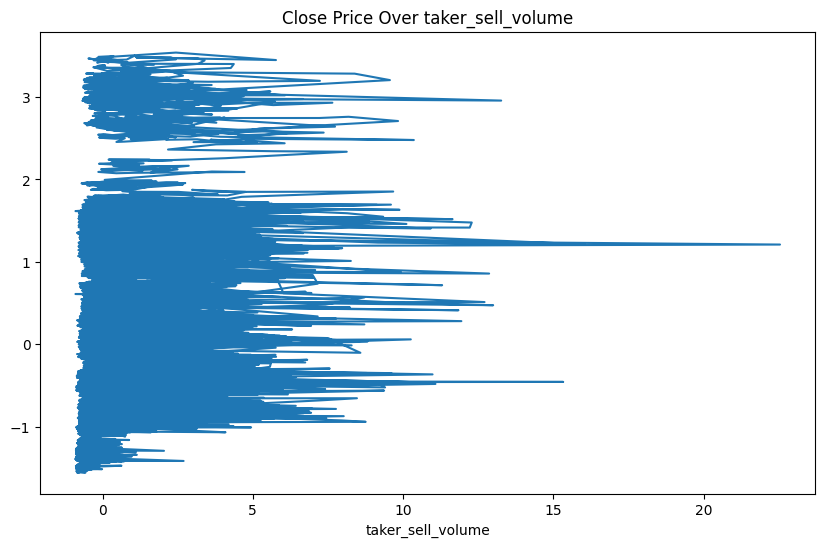

In [75]:
finance_data.set_index('taker_sell_volume')['close_price'].plot(figsize=(10, 6), title='Close Price Over taker_sell_volume')
plt.show()

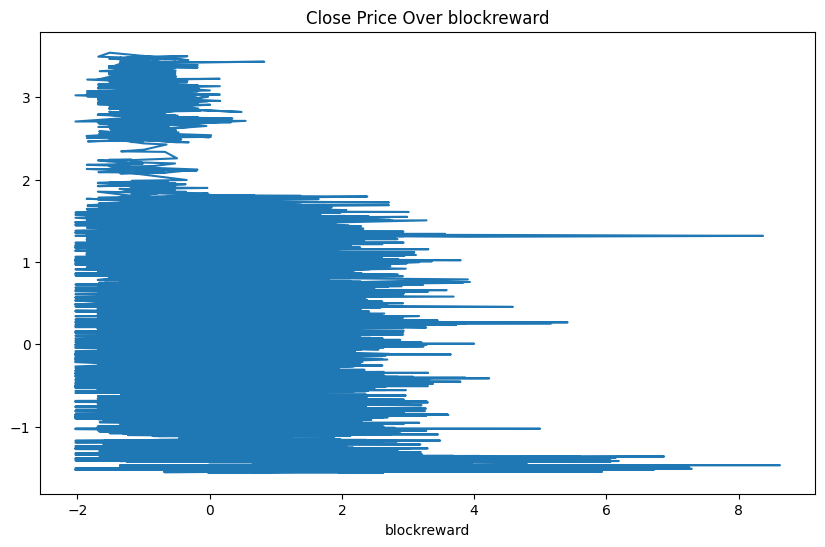

In [76]:
finance_data.set_index('blockreward')['close_price'].plot(figsize=(10, 6), title='Close Price Over blockreward')
plt.show()

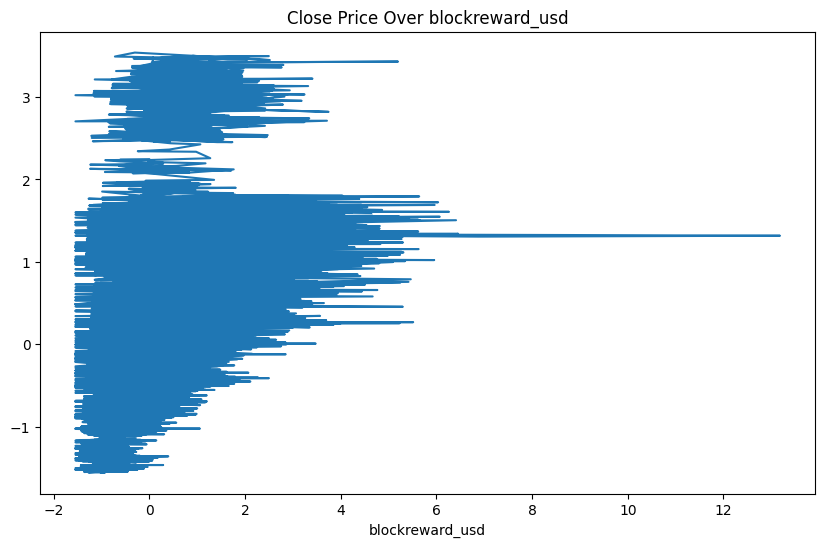

In [77]:
finance_data.set_index('blockreward_usd')['close_price'].plot(figsize=(10, 6), title='Close Price Over blockreward_usd')
plt.show()

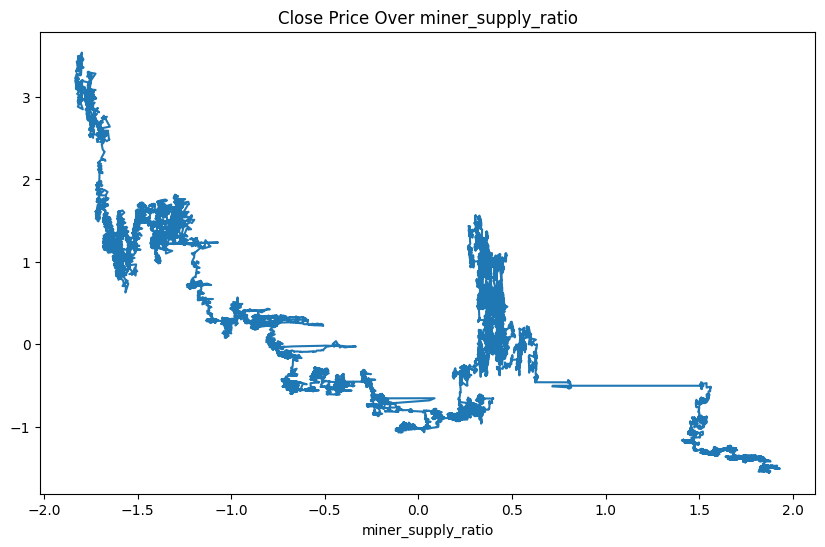

In [78]:
finance_data.set_index('miner_supply_ratio')['close_price'].plot(figsize=(10, 6), title='Close Price Over miner_supply_ratio')
plt.show()

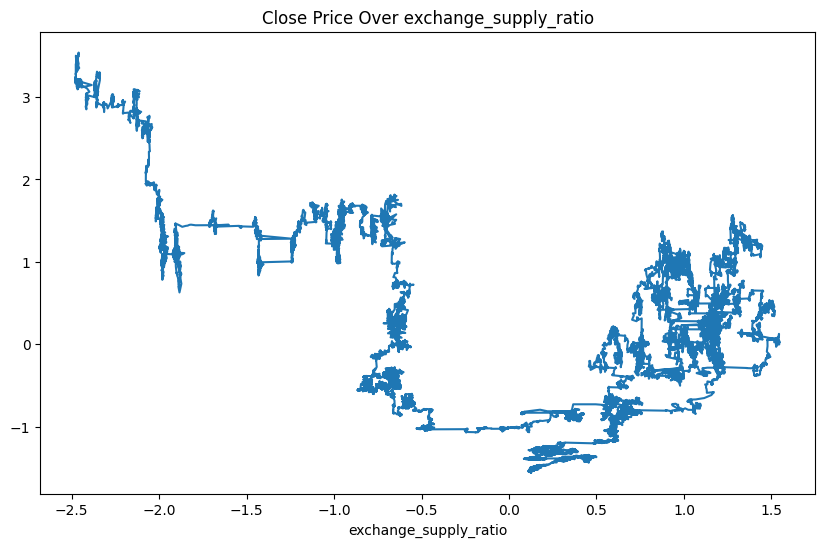

In [79]:
finance_data.set_index('exchange_supply_ratio')['close_price'].plot(figsize=(10, 6), title='Close Price Over exchange_supply_ratio')
plt.show()

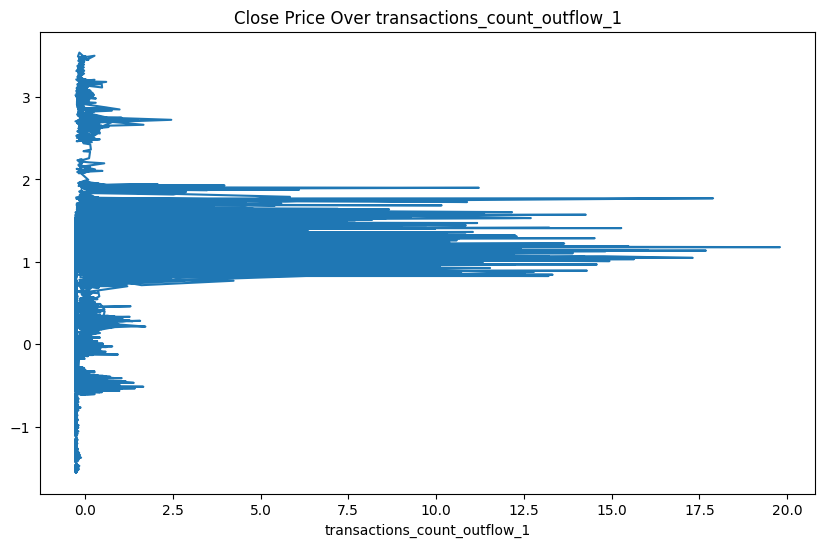

In [80]:
finance_data.set_index('transactions_count_outflow_1')['close_price'].plot(figsize=(10, 6), title='Close Price Over transactions_count_outflow_1')
plt.show()

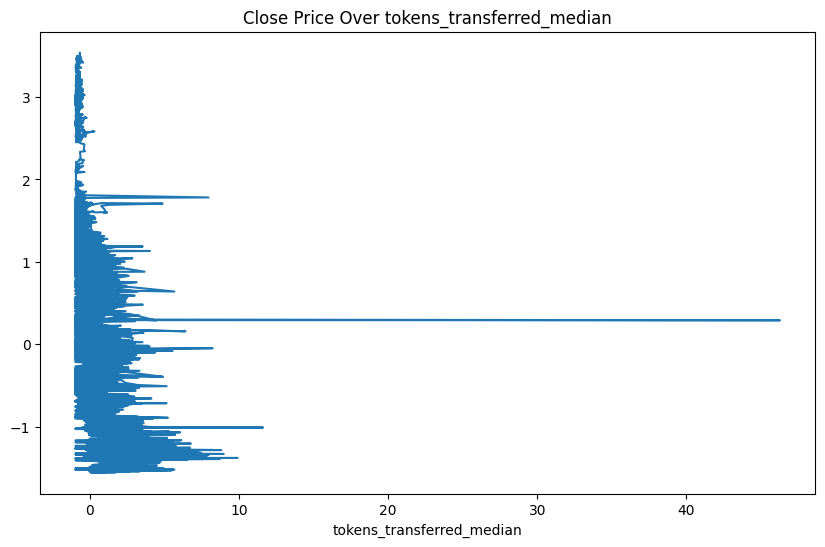

In [81]:
finance_data.set_index('tokens_transferred_median')['close_price'].plot(figsize=(10, 6), title='Close Price Over tokens_transferred_median')
plt.show()

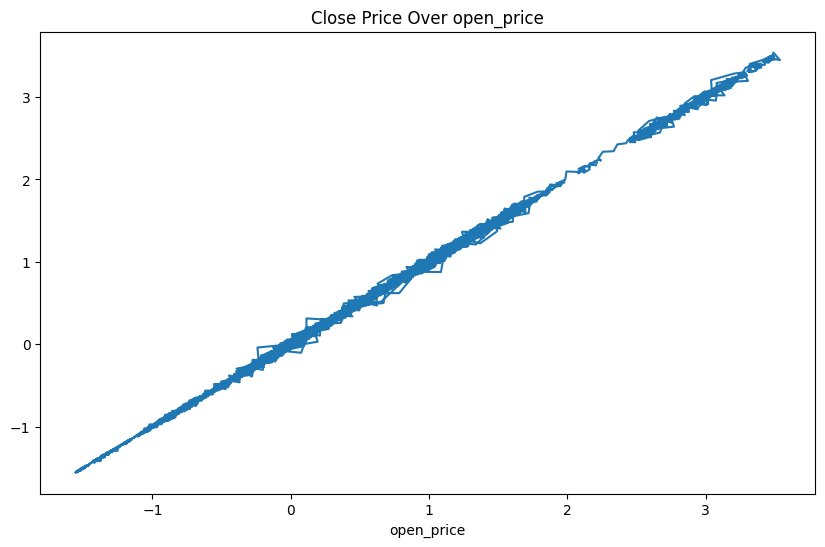

In [83]:
finance_data.set_index('open_price')['close_price'].plot(figsize=(10, 6), title='Close Price Over open_price')
plt.show()

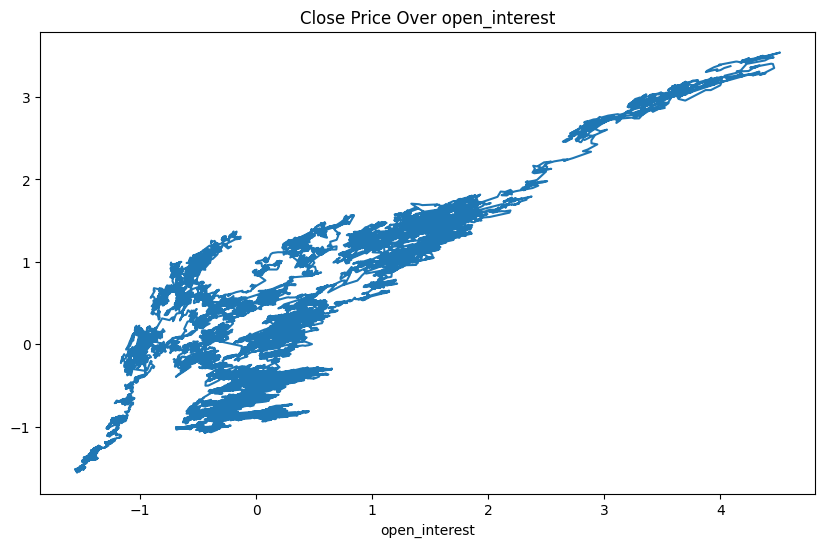

In [85]:
finance_data.set_index('open_interest')['close_price'].plot(figsize=(10, 6), title='Close Price Over open_interest')
plt.show()

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression

X = finance_data.drop(['close_price', 'time'], axis=1)
y = finance_data['close_price']
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)
print(selector.get_support(indices=True))  


[ 0 15 16 21 24 29 34 35 36 38]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

RMSE: 0.006406151385122321


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest RMSE: 0.007196465967385566


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


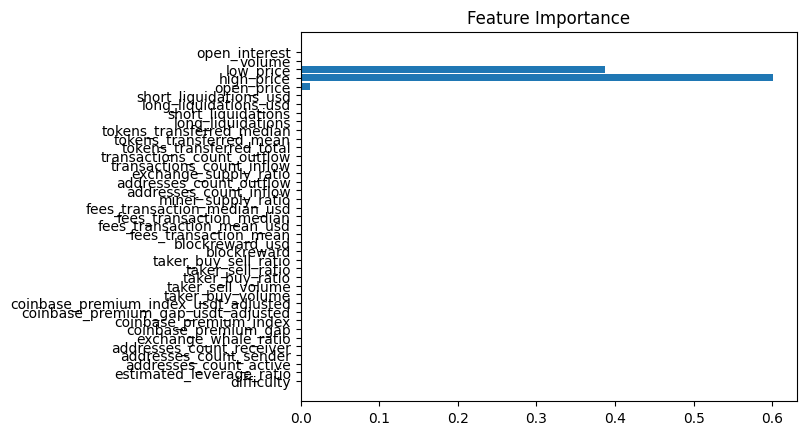

In [16]:
import matplotlib.pyplot as plt

# Feature importance for Random Forest
feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance")
plt.show()

In [17]:
important_features = ['high_price', 'low_price', 'open_price']
X = finance_data[important_features]
y = finance_data['close_price']

finance_data['price_range'] = finance_data['high_price'] - finance_data['low_price']
finance_data['mid_price'] = (finance_data['high_price'] + finance_data['low_price']) / 2
X = finance_data[important_features + ['price_range', 'mid_price']]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.006705647571600412


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_y_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 0.0073819887719082135


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


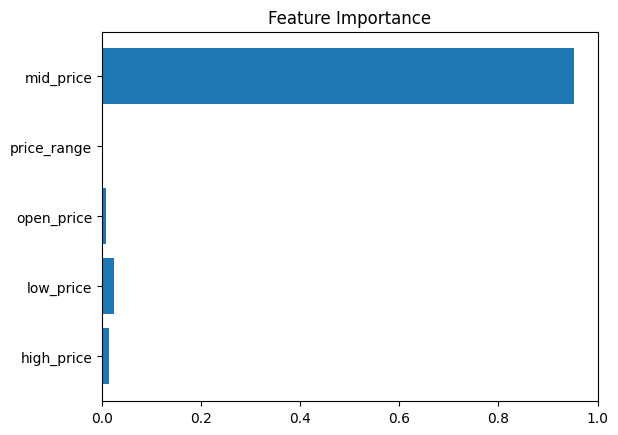

In [21]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance")
plt.show()

In [22]:
import joblib

# Save the model
joblib.dump(rf_model, "best_model.pkl")


['best_model.pkl']

In [23]:
# Confirm dataset structure
important_features = ['mid_price', 'price_range', 'high_price', 'low_price', 'open_price']
X = finance_data[important_features]
y = finance_data['close_price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 0.00670561874025594


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")


Random Forest RMSE: 0.007395632223295961


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"XGBoost RMSE: {xgb_rmse}")


XGBoost RMSE: 0.01719773846372233


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'n_estimators': 300}


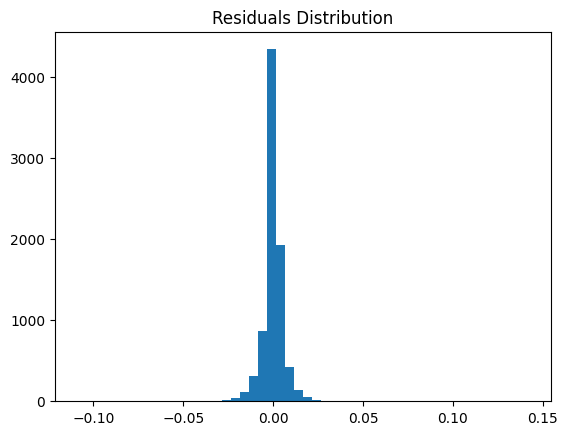

In [33]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.title("Residuals Distribution")
plt.show()


In [28]:
import joblib
joblib.dump(rf_model, 'best_model.pkl')


['best_model.pkl']

Potential Outliers

In [35]:
import numpy as np
residuals = y_test - y_pred
outliers = np.where(np.abs(residuals) > 0.05)
print("Outlier Indices:", outliers)


Outlier Indices: (array([ 953, 1241, 1551, 2993, 5160, 6850, 7364, 7462, 7499]),)


In [36]:
import joblib
joblib.dump(model, "linear_regression_model.pkl")


['linear_regression_model.pkl']

In [ ]:
outlier_rows = finance_data.iloc[[953, 1241, 1551, 2993, 5160, 6850, 7364, 7462, 7499]]
print(outlier_rows)

In [38]:
outlier_rows.to_csv('outlier_rows.csv', index=False)

# Print confirmation message
print("Outlier rows have been saved to 'outlier_rows.csv'")

Outlier rows have been saved to 'outlier_rows.csv'


In [40]:
import pandas as pd

outlier_data = pd.read_csv('C:/Users/User/OneDrive - Asia Pacific University/UM Datathon/UM_Code/outlier_rows.csv')

In [42]:
print(outlier_data.describe())

       difficulty  estimated_leverage_ratio  addresses_count_active  \
count    9.000000                  9.000000                9.000000   
mean    -0.901730                 -1.125776                0.068513   
std      0.089678                  0.353274                0.824790   
min     -1.023767                 -1.350566               -1.098867   
25%     -0.986992                 -1.294499               -0.207477   
50%     -0.892095                 -1.232662                0.054255   
75%     -0.807499                 -1.183989                0.557039   
max     -0.807499                 -0.208360                1.323991   

       addresses_count_sender  addresses_count_receiver  exchange_whale_ratio  \
count                9.000000                  9.000000              9.000000   
mean                 0.034340                  0.128327             -0.005648   
std                  0.774220                  0.791687              0.725015   
min                 -1.149850       

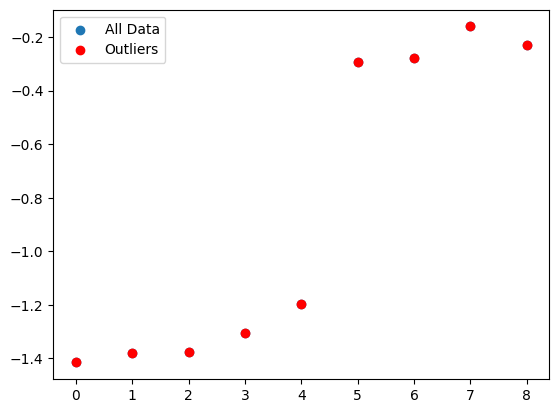

In [44]:
import matplotlib.pyplot as plt
plt.scatter(outlier_data.index, outlier_data['close_price'], label="All Data")
plt.scatter(outlier_data.index, outlier_data['close_price'], color='red', label="Outliers")
plt.legend()
plt.show()


Go back

In [48]:
important_features = ['mid_price', 'price_range', 'high_price', 'low_price', 'open_price']
X = finance_data[important_features]
y = finance_data['close_price']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Random Forest RMSE on Original Dataset: {rmse}")


Random Forest RMSE on Original Dataset: 0.0073883814324193185


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


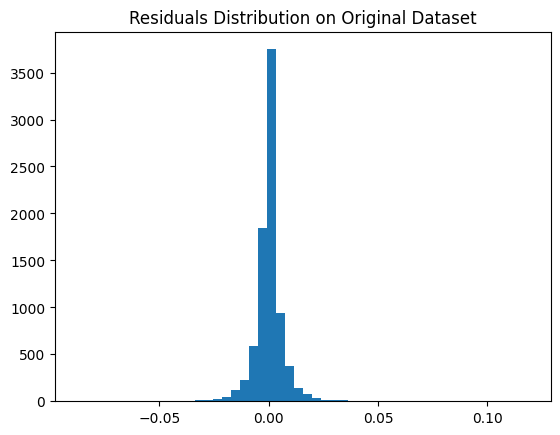

In [51]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.title("Residuals Distribution on Original Dataset")
plt.show()

In [54]:
correlation = finance_data[['difficulty', 'close_price']].corr()
print(correlation)

             difficulty  close_price
difficulty     1.000000     0.639837
close_price    0.639837     1.000000


In [55]:
correlation = finance_data[['estimated_leverage_ratio', 'close_price']].corr()
print(correlation)


                          estimated_leverage_ratio  close_price
estimated_leverage_ratio                  1.000000    -0.158837
close_price                              -0.158837     1.000000


In [56]:
correlation = finance_data[['addresses_count_active', 'close_price']].corr()
print(correlation)


                        addresses_count_active  close_price
addresses_count_active                1.000000    -0.000141
close_price                          -0.000141     1.000000


In [57]:
correlation = finance_data[['addresses_count_sender', 'close_price']].corr()
print(correlation)


                        addresses_count_sender  close_price
addresses_count_sender                1.000000     0.102859
close_price                           0.102859     1.000000


In [64]:
pd.set_option('display.max_columns', 50)

correlation_with_close_price = finance_data.corr()['close_price']

correlation_sorted = correlation_with_close_price.abs().sort_values(ascending=False)

print("Correlations with 'close_price':")
print(correlation_sorted)


Correlations with 'close_price':
close_price                             1.000000
mid_price                               0.999973
high_price                              0.999947
low_price                               0.999936
open_price                              0.999906
open_interest                           0.842432
miner_supply_ratio                      0.712875
difficulty                              0.639837
time                                    0.566715
blockreward_usd                         0.561912
tokens_transferred_median               0.551104
exchange_supply_ratio                   0.336219
blockreward                             0.309306
taker_sell_volume                       0.300727
taker_buy_volume                        0.297314
transactions_count_outflow              0.287564
addresses_count_inflow                  0.218503
fees_transaction_median_usd             0.177226
fees_transaction_mean_usd               0.166919
estimated_leverage_ratio            

In [68]:
# List of specific variables to check
specific_variables = [
    'coinbase_premium_index', 
    'coinbase_premium_gap_usdt_adjusted', 
    'taker_buy_ratio', 
    'taker_sell_ratio', 
    'taker_buy_sell_ratio',
    'blockreward_usd', 
    'fees_transaction_mean', 
    'addresses_count_outflow', 
    'tokens_transferred_total', 
    'tokens_transferred_mean', 
    'long_liquidations', 
    'short_liquidations',
    'long_liquidations_usd', 
    'short_liquidations_usd', 
    'volume'
]

# Correlation with 'close_price' for the specific variables
correlations_specific = finance_data.corr()['close_price'][specific_variables]

# Print the correlations
print("Correlations of specific variables with 'close_price':")
print(correlations_specific)


Correlations of specific variables with 'close_price':
coinbase_premium_index               -0.020911
coinbase_premium_gap_usdt_adjusted    0.004622
taker_buy_ratio                      -0.038593
taker_sell_ratio                      0.038593
taker_buy_sell_ratio                 -0.043311
blockreward_usd                       0.561912
fees_transaction_mean                -0.101973
addresses_count_outflow               0.118641
tokens_transferred_total             -0.038672
tokens_transferred_mean              -0.056378
long_liquidations                    -0.044583
short_liquidations                   -0.068607
long_liquidations_usd                 0.023953
short_liquidations_usd                0.045097
volume                                0.046385
Name: close_price, dtype: float64


In [71]:
# Get the current column names
columns = list(finance_data.columns)

# Rename specific columns by their index positions
columns[26] = 'transactions_count_inflow_1'  # Column 27
columns[27] = 'transactions_count_outflow_1'  # Column 28
columns[31] = 'transactions_count_inflow_2'  # Column 32
columns[32] = 'transactions_count_outflow_2'  # Column 33

# Assign the updated column names back to the DataFrame
finance_data.columns = columns

# Verify the updated column names
print(finance_data.columns)


Index(['time', 'difficulty', 'estimated_leverage_ratio',
       'addresses_count_active', 'addresses_count_sender',
       'addresses_count_receiver', 'exchange_whale_ratio',
       'coinbase_premium_gap', 'coinbase_premium_index',
       'coinbase_premium_gap_usdt_adjusted',
       'coinbase_premium_index_usdt_adjusted', 'taker_buy_volume',
       'taker_sell_volume', 'taker_buy_ratio', 'taker_sell_ratio',
       'taker_buy_sell_ratio', 'blockreward', 'blockreward_usd',
       'fees_transaction_mean', 'fees_transaction_mean_usd',
       'fees_transaction_median', 'fees_transaction_median_usd',
       'miner_supply_ratio', 'addresses_count_inflow',
       'addresses_count_outflow', 'exchange_supply_ratio',
       'transactions_count_inflow_1', 'transactions_count_outflow_1',
       'tokens_transferred_total', 'tokens_transferred_mean',
       'tokens_transferred_median', 'transactions_count_inflow_2',
       'transactions_count_outflow_2', 'long_liquidations_usd',
       'short_liquida

In [72]:
# List of specific variables to check
specific_variables = [
    'transactions_count_inflow_1', 
    'transactions_count_outflow_1', 
    'transactions_count_inflow_2', 
    'transactions_count_outflow_2'
]

# Correlation with 'close_price' for the specific variables
correlations_specific = finance_data.corr()['close_price'][specific_variables]

print("Correlations of specific variables with 'close_price':")
print(correlations_specific)


Correlations of specific variables with 'close_price':
transactions_count_inflow_1     0.026446
transactions_count_outflow_1    0.287564
transactions_count_inflow_2    -0.044583
transactions_count_outflow_2   -0.068607
Name: close_price, dtype: float64


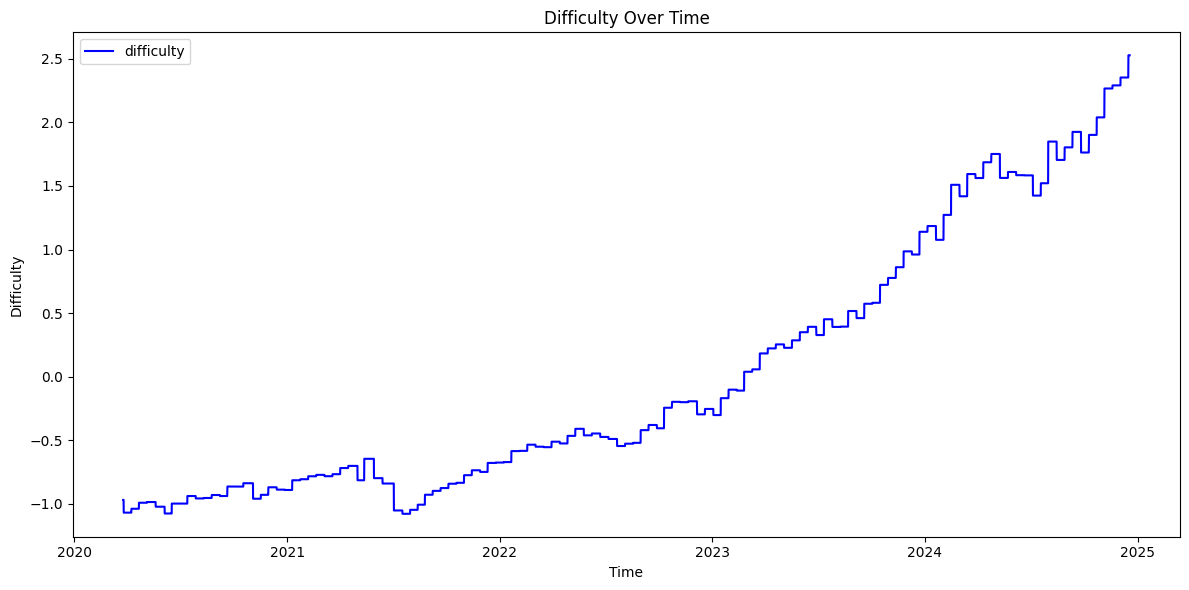

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['difficulty'], label='difficulty', color='blue')

plt.title('Difficulty Over Time')
plt.xlabel('Time')
plt.ylabel('Difficulty')
plt.legend()

plt.tight_layout()
plt.show()

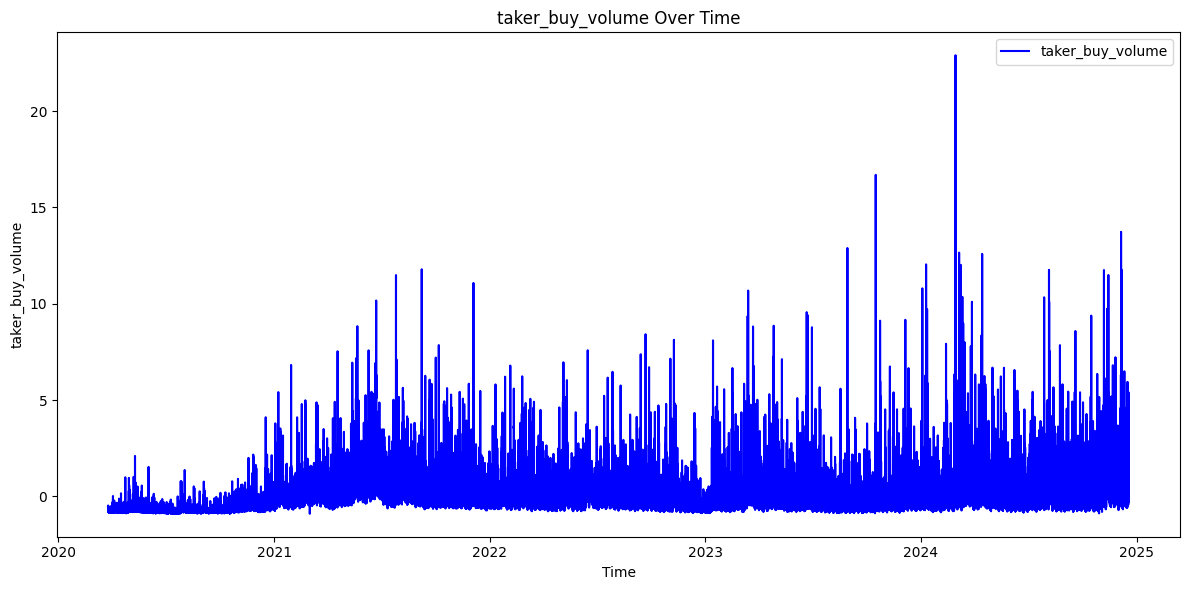

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['taker_buy_volume'], label='taker_buy_volume', color='blue')

plt.title('taker_buy_volume Over Time')
plt.xlabel('Time')
plt.ylabel('taker_buy_volume')
plt.legend()

plt.tight_layout()
plt.show()

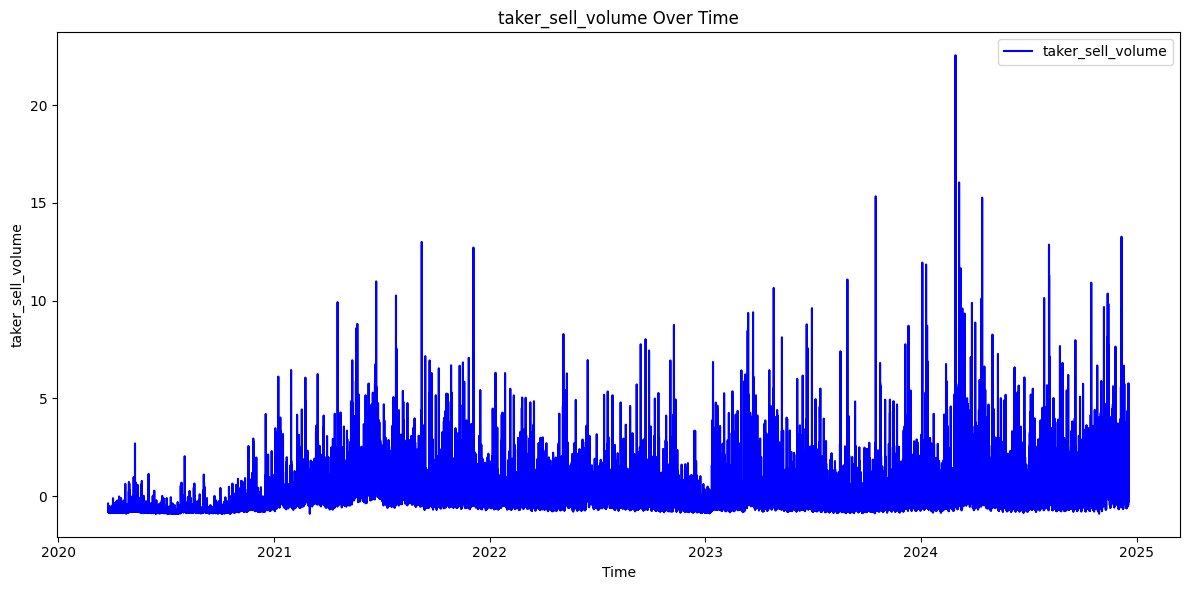

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['taker_sell_volume'], label='taker_sell_volume', color='blue')

plt.title('taker_sell_volume Over Time')
plt.xlabel('Time')
plt.ylabel('taker_sell_volume')
plt.legend()

plt.tight_layout()
plt.show()

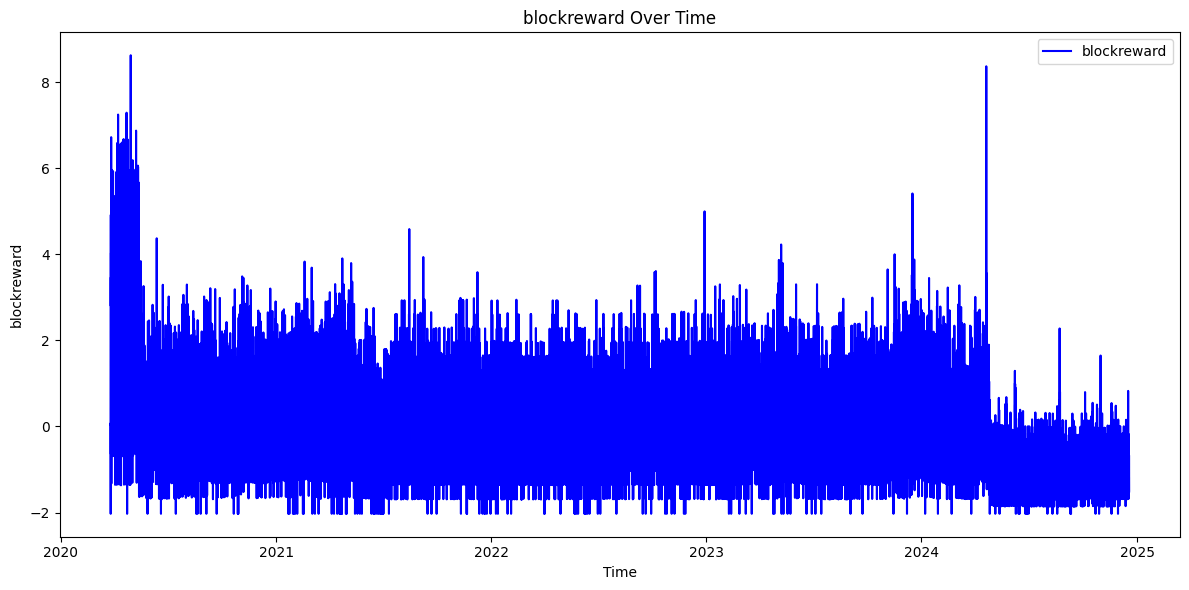

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['blockreward'], label='blockreward', color='blue')

plt.title('blockreward Over Time')
plt.xlabel('Time')
plt.ylabel('blockreward')
plt.legend()

plt.tight_layout()
plt.show()

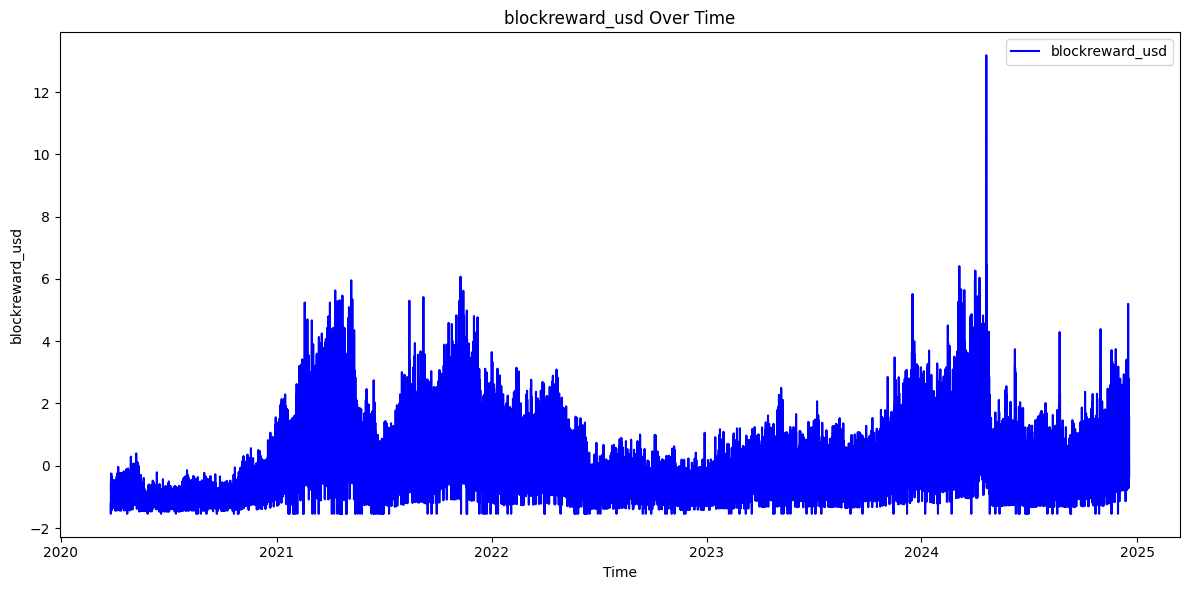

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['blockreward_usd'], label='blockreward_usd', color='blue')

plt.title('blockreward_usd Over Time')
plt.xlabel('Time')
plt.ylabel('blockreward_usd')
plt.legend()

plt.tight_layout()
plt.show()

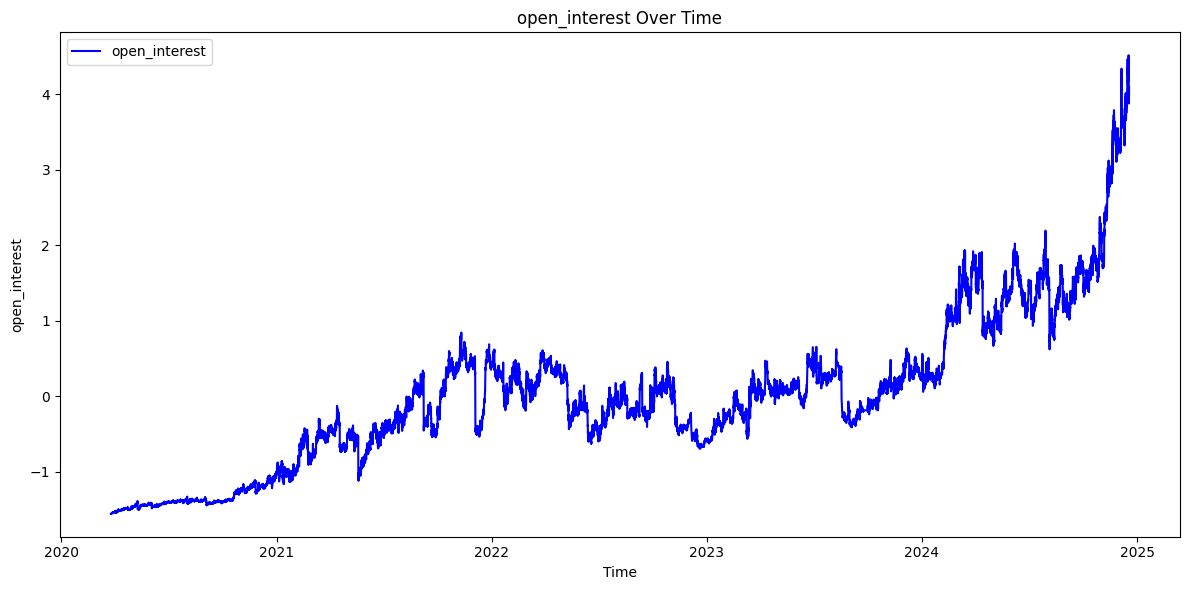

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['open_interest'], label='open_interest', color='blue')

plt.title('open_interest Over Time')
plt.xlabel('Time')
plt.ylabel('open_interest')
plt.legend()

plt.tight_layout()
plt.show()

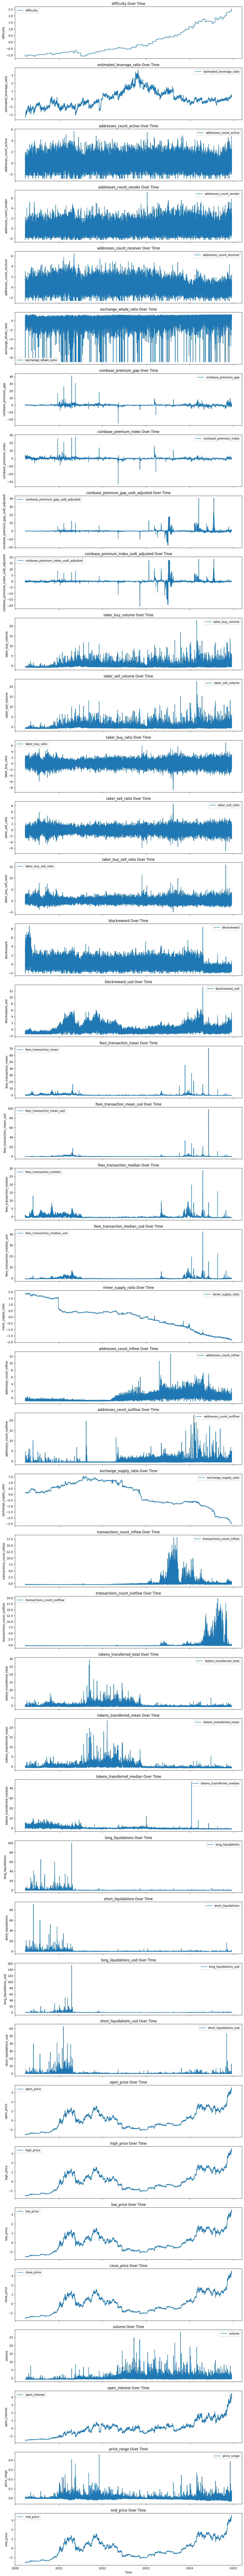

In [ ]:
import matplotlib.pyplot as plt

# Create derived columns
finance_data['price_range'] = finance_data['high_price'] - finance_data['low_price']
finance_data['mid_price'] = (finance_data['high_price'] + finance_data['low_price']) / 2

numeric_columns = finance_data.select_dtypes(include=['number']).columns

num_plots = len(numeric_columns)
fig, axes = plt.subplots(num_plots, 1, figsize=(12, num_plots * 3), sharex=True)

for i, column in enumerate(numeric_columns):
    axes[i].plot(finance_data['time'], finance_data[column], label=column)
    axes[i].set_title(f'{column} Over Time')
    axes[i].set_ylabel(column)
    axes[i].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()


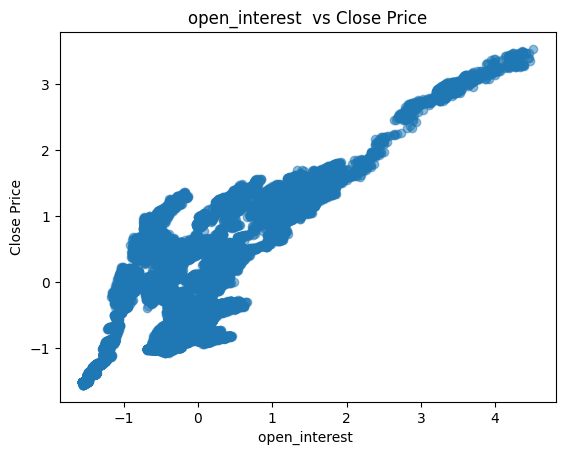

In [121]:
# Scatterplot example
plt.scatter(finance_data['open_interest'], finance_data['close_price'], alpha=0.5)
plt.title('open_interest  vs Close Price')
plt.xlabel('open_interest ')
plt.ylabel('Close Price')
plt.show()


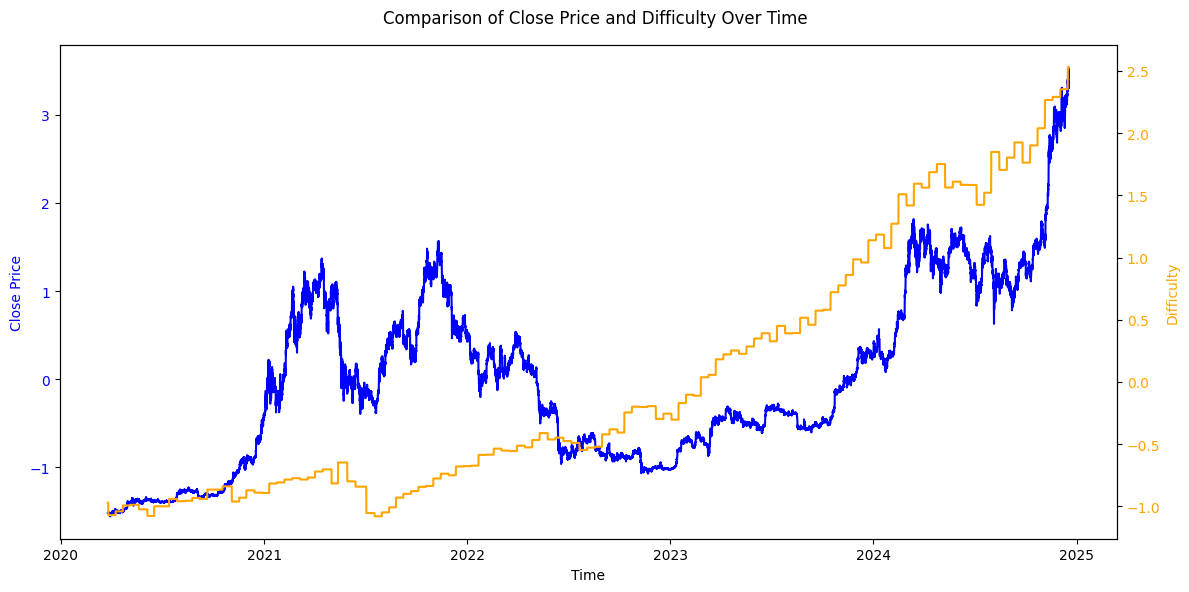

In [122]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(finance_data['time'], finance_data['close_price'], label='Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Difficulty', color='orange')
ax2.plot(finance_data['time'], finance_data['difficulty'], label='Difficulty', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Comparison of Close Price and Difficulty Over Time')
fig.tight_layout()
plt.show()


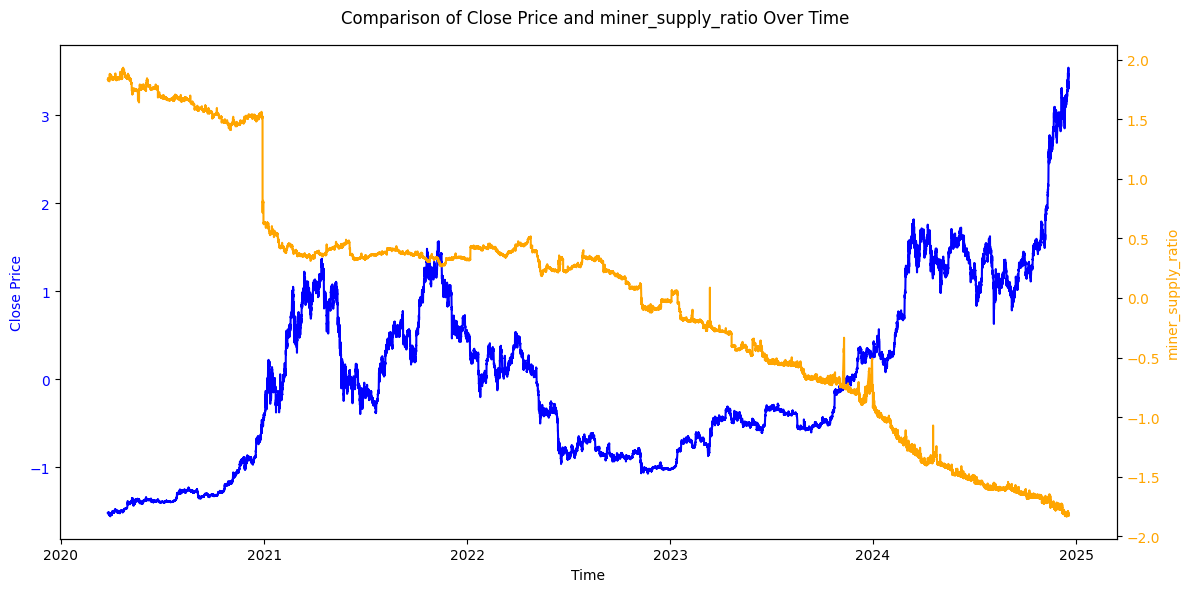

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(finance_data['time'], finance_data['close_price'], label='Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('miner_supply_ratio', color='orange')
ax2.plot(finance_data['time'], finance_data['miner_supply_ratio'], label='miner_supply_ratio', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Comparison of Close Price and miner_supply_ratio Over Time')
fig.tight_layout()
plt.show()


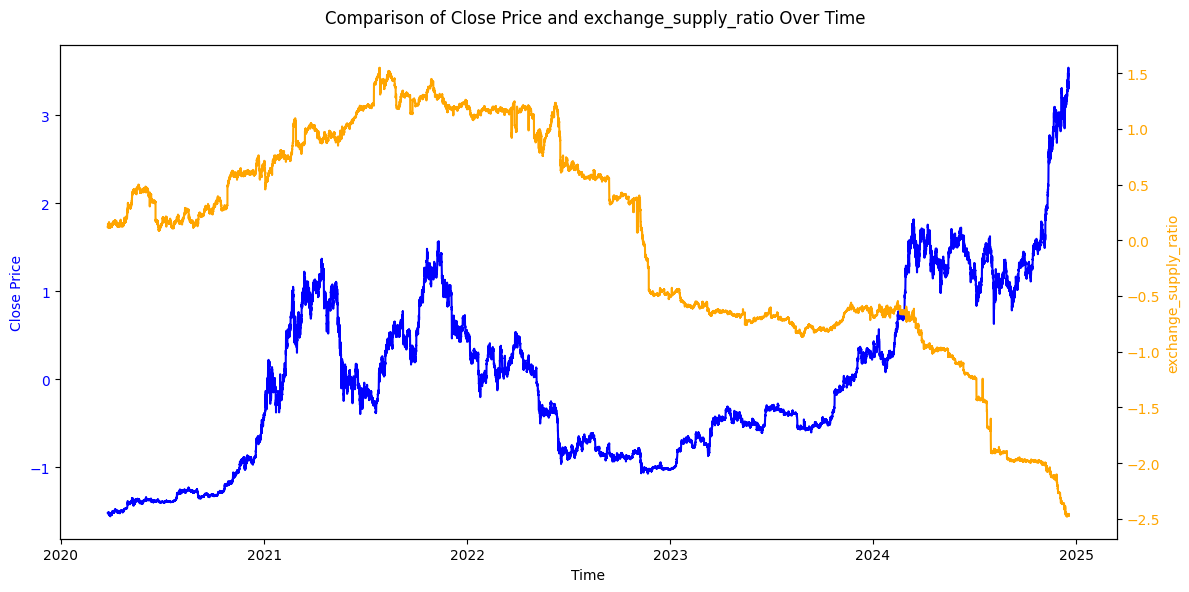

In [8]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(finance_data['time'], finance_data['close_price'], label='Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('exchange_supply_ratio', color='orange')
ax2.plot(finance_data['time'], finance_data['exchange_supply_ratio'], label='exchange_supply_ratio', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Comparison of Close Price and exchange_supply_ratio Over Time')
fig.tight_layout()
plt.show()


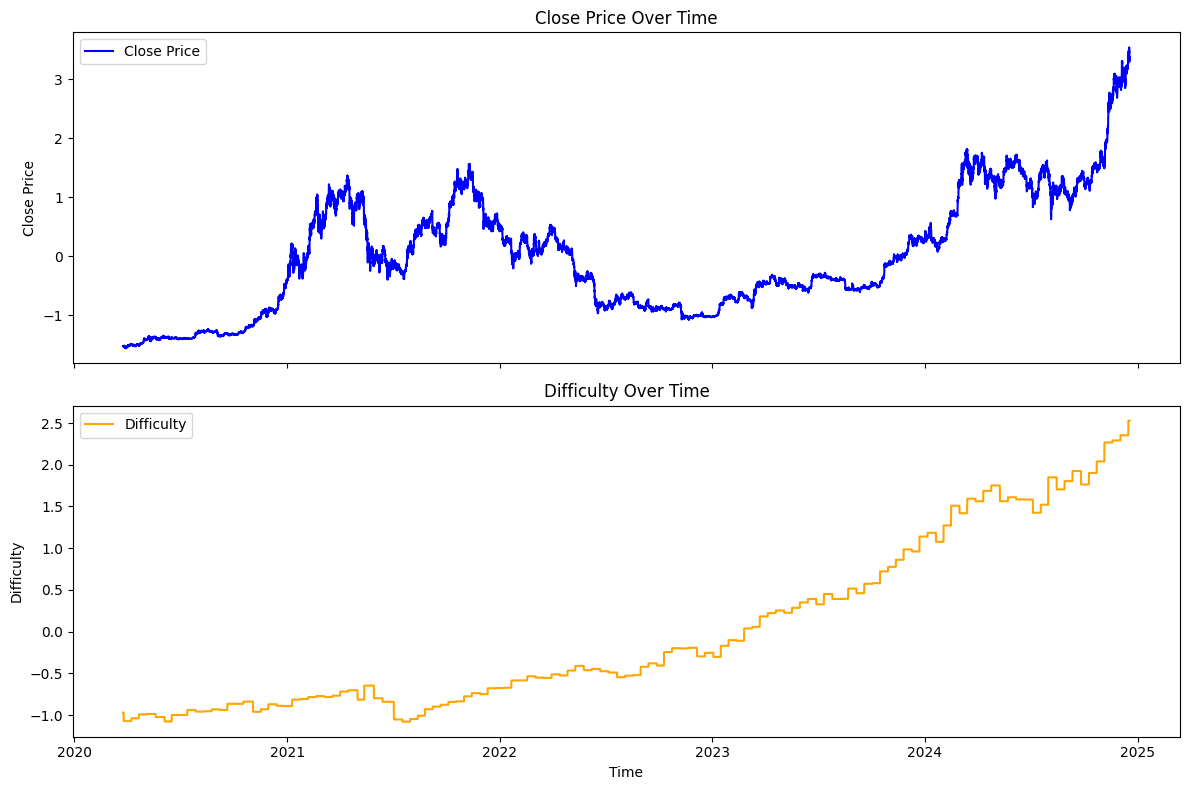

In [129]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot close_price over time
axes[0].plot(finance_data['time'], finance_data['close_price'], label='Close Price', color='blue')
axes[0].set_title('Close Price Over Time')
axes[0].set_ylabel('Close Price')
axes[0].legend()

# Plot difficulty over time
axes[1].plot(finance_data['time'], finance_data['difficulty'], label='Difficulty', color='orange')
axes[1].set_title('Difficulty Over Time')
axes[1].set_ylabel('Difficulty')
axes[1].legend()

# Add x-axis label
plt.xlabel('Time')
plt.tight_layout()
plt.show()


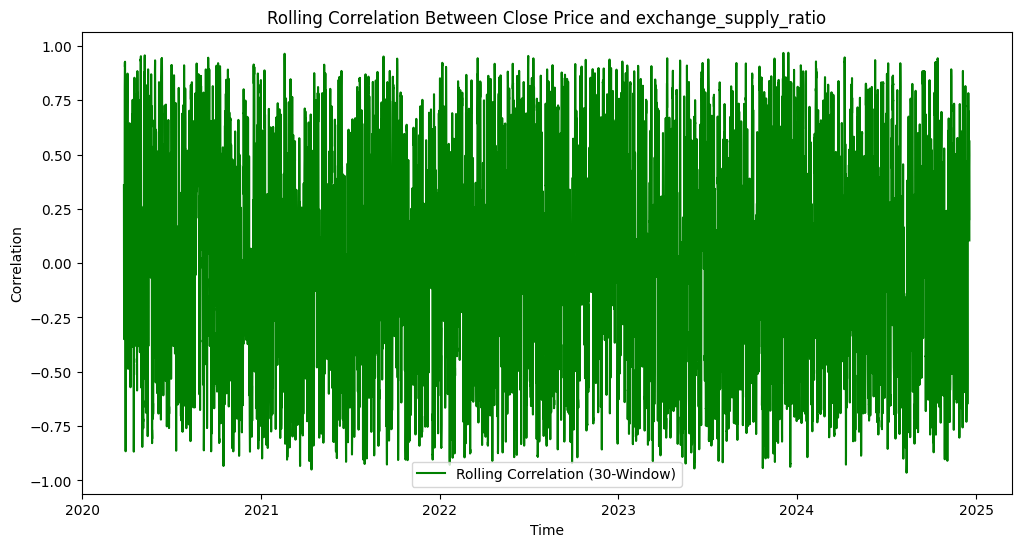

In [10]:
rolling_corr = finance_data['close_price'].rolling(window=30).corr(finance_data['exchange_supply_ratio'])

plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], rolling_corr, label='Rolling Correlation (30-Window)', color='green')
plt.title('Rolling Correlation Between Close Price and exchange_supply_ratio')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.show()


In [136]:
finance_data['open_price_lag'] = finance_data['open_price'].shift(1)

lagged_corr = finance_data[['close_price', 'open_price_lag']].corr()
print("Correlation with lagged open_price:")
print(lagged_corr)


Correlation with lagged open_price:
                close_price  open_price_lag
close_price        1.000000        0.999813
open_price_lag     0.999813        1.000000


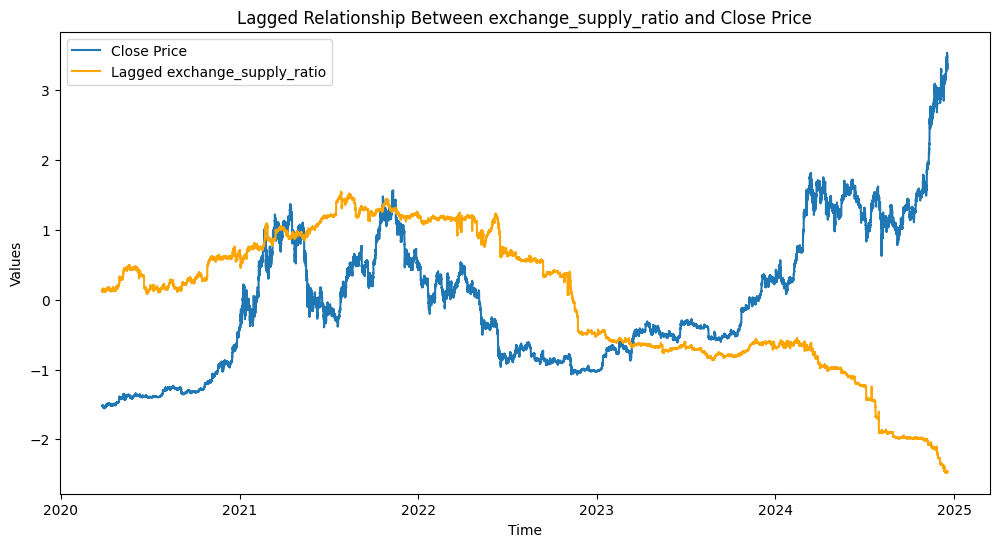

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['close_price'], label='Close Price')
plt.plot(finance_data['time'], finance_data['exchange_supply_ratio'].shift(1), label='Lagged exchange_supply_ratio', color='orange')
plt.legend()
plt.title('Lagged Relationship Between exchange_supply_ratio and Close Price')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [137]:
correlation = finance_data[['close_price', 'difficulty', 'miner_supply_ratio', 'open_price']].corr()
print(correlation)


                    close_price  difficulty  miner_supply_ratio  open_price
close_price            1.000000    0.639837           -0.712875    0.999906
difficulty             0.639837    1.000000           -0.922150    0.639787
miner_supply_ratio    -0.712875   -0.922150            1.000000   -0.712865
open_price             0.999906    0.639787           -0.712865    1.000000


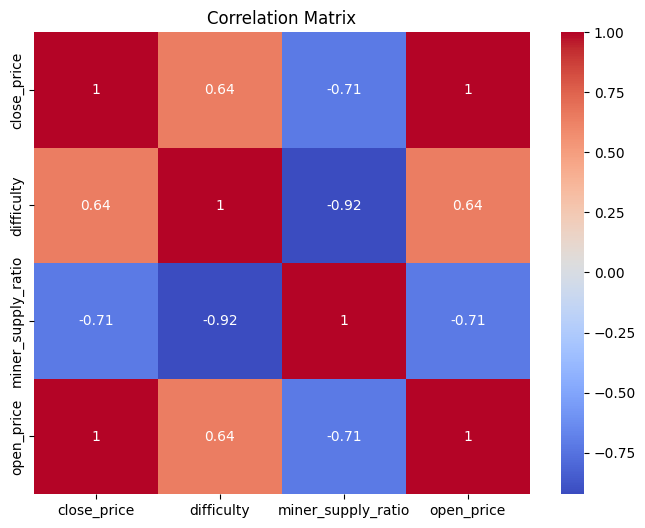

In [138]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [142]:
from sklearn.linear_model import LinearRegression

X = finance_data[['difficulty', 'miner_supply_ratio', 'open_price']]
y = finance_data['close_price']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [2.46137675e-04 7.73251266e-05 9.99803788e-01]
Intercept: -4.338782368973947e-17


In [145]:
threshold = 2  
high_miner_open_price = finance_data[finance_data['open_price'] > threshold]
low_miner_open_price= finance_data[finance_data['open_price'] <= threshold]

print("High miner_open_price Average Close Price:", high_miner_open_price['close_price'].mean())
print("Low miner_open_price Average Close Price:", low_miner_open_price['close_price'].mean())


High miner_open_price Average Close Price: 2.925607512693099
Low miner_open_price Average Close Price: -0.0662567659174684


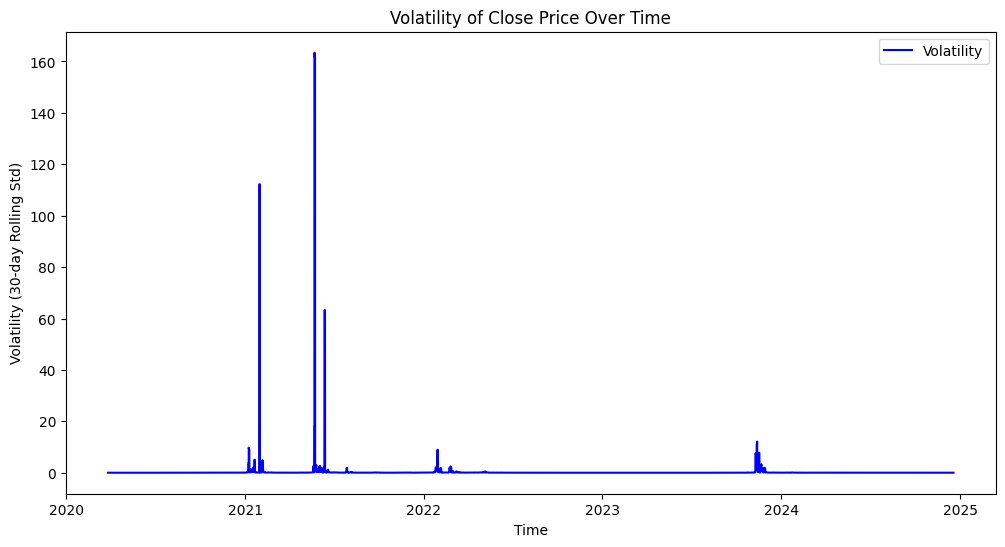

In [146]:
finance_data['price_change'] = finance_data['close_price'].pct_change()

finance_data['volatility'] = finance_data['price_change'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['volatility'], label='Volatility', color='blue')
plt.title('Volatility of Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Volatility (30-day Rolling Std)')
plt.legend()
plt.show()

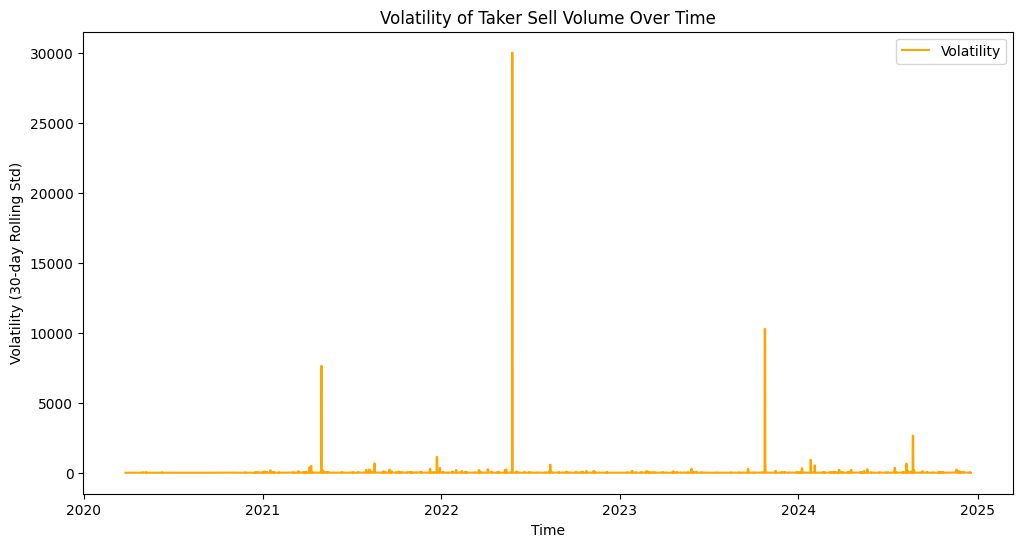

In [183]:
# Calculate daily percentage change for taker_sell_volume
finance_data['taker_sell_volume_change'] = finance_data['taker_sell_volume'].pct_change()

# Calculate rolling standard deviation as a measure of volatility
finance_data['taker_sell_volume_volatility'] = finance_data['taker_sell_volume_change'].rolling(window=30).std()

# Plot volatility over time
plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['taker_sell_volume_volatility'], label='Volatility', color='orange')
plt.title('Volatility of Taker Sell Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volatility (30-day Rolling Std)')
plt.legend()
plt.show()


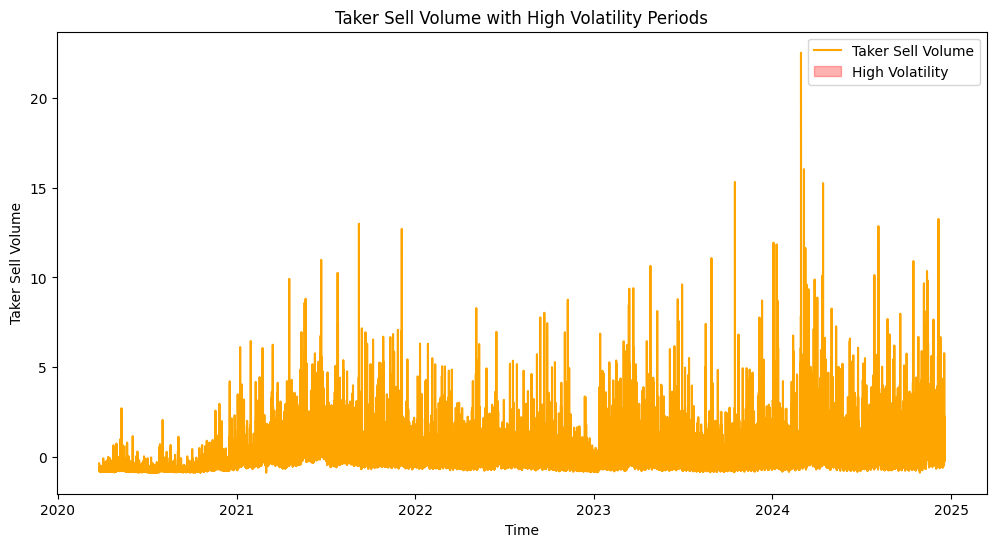

In [ ]:
# Define a threshold for high and low volatility
volatility_threshold = finance_data['taker_sell_volume_volatility'].mean() + finance_data['taker_sell_volume_volatility'].std()

# Classify periods
finance_data['taker_sell_volatility_category'] = finance_data['taker_sell_volume_volatility'].apply(
    lambda x: 'High' if x > volatility_threshold else 'Low'
)

# Plot taker_sell_volume with high volatility periods highlighted
plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['taker_sell_volume'], label='Taker Sell Volume', color='orange')
plt.fill_between(finance_data['time'], finance_data['taker_sell_volume'], 
                 where=finance_data['taker_sell_volatility_category'] == 'High', 
                 color='red', alpha=0.3, label='High Volatility')
plt.title('Taker Sell Volume with High Volatility Periods')
plt.xlabel('Time')
plt.ylabel('Taker Sell Volume')
plt.legend()
plt.show()


In [181]:
# Filter high and low volatility periods
high_volatility = finance_data[finance_data['taker_buy_volatility_category'] == 'High']
low_volatility = finance_data[finance_data['taker_buy_volatility_category'] == 'Low']

# Compare averages
print("High Volatility Period Average Taker Buy Volume:", high_volatility['taker_buy_volume'].mean())
print("Low Volatility Period Average Taker Buy Volume:", low_volatility['taker_buy_volume'].mean())


High Volatility Period Average Taker Buy Volume: 0.1654772236224292
Low Volatility Period Average Taker Buy Volume: -0.0010837016197258542


                              taker_sell_volume_volatility  close_price  \
taker_sell_volume_volatility                      1.000000     0.005114   
close_price                                       0.005114     1.000000   
difficulty                                       -0.003367     0.639837   

                              difficulty  
taker_sell_volume_volatility   -0.003367  
close_price                     0.639837  
difficulty                      1.000000  


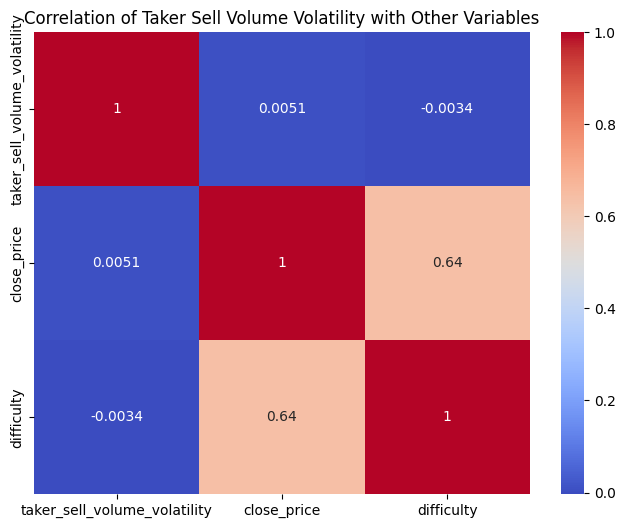

In [ ]:
volatility_corr = finance_data[['taker_buy_volume_volatility', 'close_price', 'difficulty']].corr()
print(volatility_corr)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(volatility_corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Taker Buy Volume Volatility with Other Variables')
plt.show()


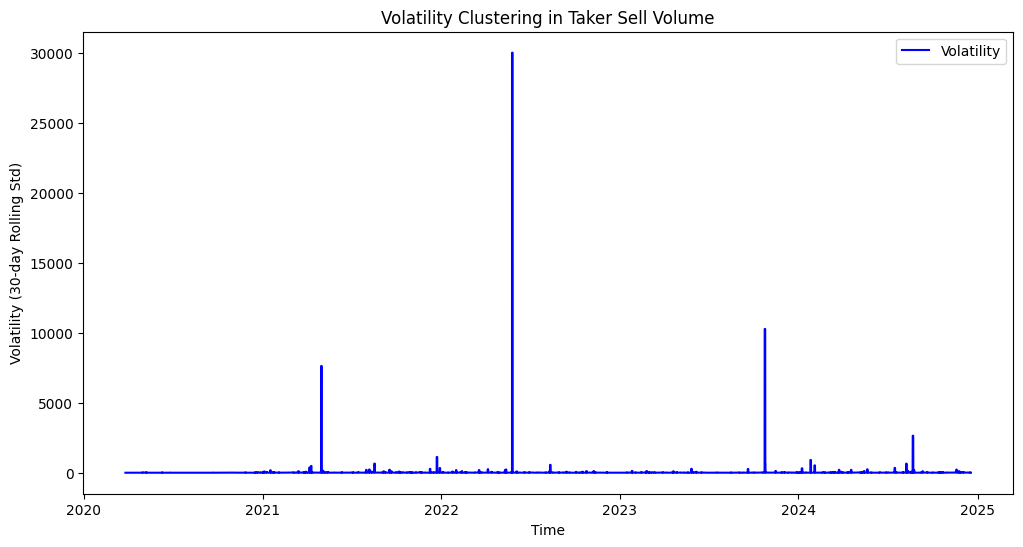

In [187]:
# Plot volatility clustering for taker_sell_volume
plt.figure(figsize=(12, 6))
plt.plot(finance_data['time'], finance_data['taker_sell_volume_volatility'], label='Volatility', color='blue')
plt.title('Volatility Clustering in Taker Sell Volume')
plt.xlabel('Time')
plt.ylabel('Volatility (30-day Rolling Std)')
plt.legend()
plt.show()


                  difficulty  taker_buy_volume  blockreward_usd  close_price
difficulty          1.000000          0.152386         0.184365     0.639837
taker_buy_volume    0.152386          1.000000         0.195765     0.297314
blockreward_usd     0.184365          0.195765         1.000000     0.561912
close_price         0.639837          0.297314         0.561912     1.000000


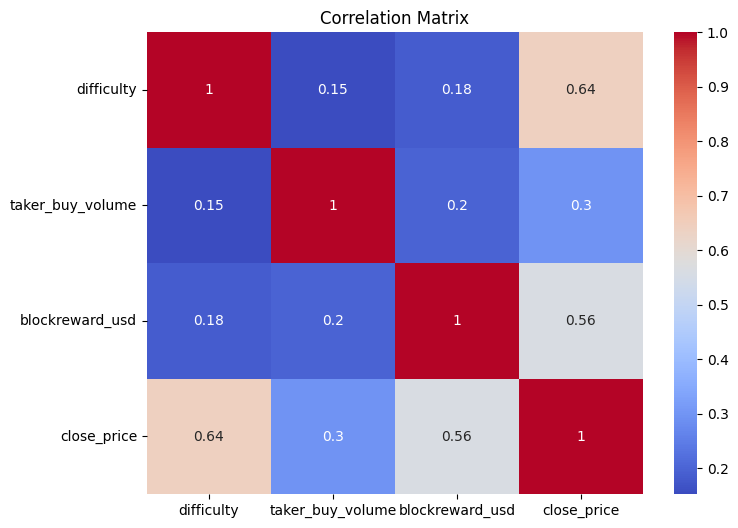

In [191]:
# Calculate the correlation matrix
correlation_matrix = finance_data[['difficulty', 'taker_buy_volume', 'blockreward_usd', 'close_price']].corr()
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


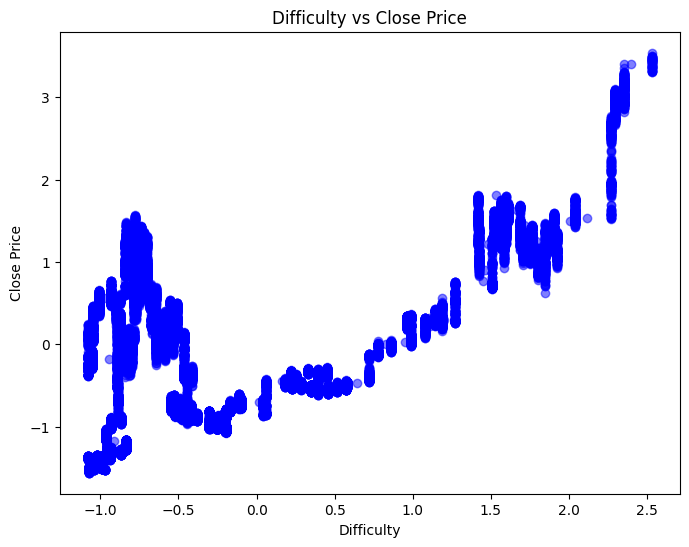

In [192]:
# Scatterplot for Difficulty vs Close Price
plt.figure(figsize=(8, 6))
plt.scatter(finance_data['difficulty'], finance_data['close_price'], alpha=0.5, color='blue')
plt.title('Difficulty vs Close Price')
plt.xlabel('Difficulty')
plt.ylabel('Close Price')
plt.show()

In [193]:
from sklearn.linear_model import LinearRegression

X = finance_data[['difficulty']]
y = finance_data['close_price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient for Difficulty:", model.coef_[0])

finance_data['predicted_close_price'] = model.predict(X)

Intercept: 2.0774424613705122e-16
Coefficient for Difficulty: 0.6398367937383278


In [194]:
X = finance_data[['difficulty', 'taker_buy_volume', 'blockreward_usd']]
y = finance_data['close_price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:")
feature_names = ['difficulty', 'taker_buy_volume', 'blockreward_usd']
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef:.4f}")

from sklearn.metrics import r2_score
r2 = r2_score(y, model.predict(X))
print("R-squared:", r2)


Intercept: 8.906484039439459e-17
Coefficients:
difficulty: 0.5395
taker_buy_volume: 0.1295
blockreward_usd: 0.4371
R-squared: 0.6293173742265427


Coefficient (Slope): 0.6398367937383278
Intercept: 2.0774424613705122e-16


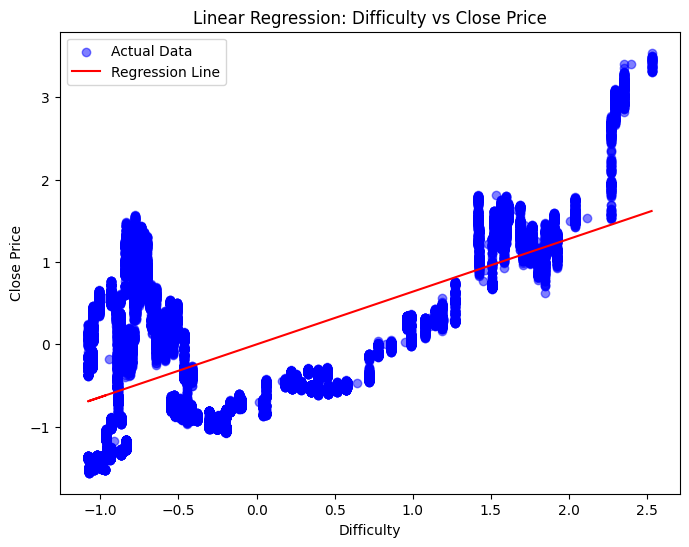

In [195]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = finance_data[['difficulty']]  # Independent variable
y = finance_data['close_price']  # Dependent variable

model = LinearRegression()
model.fit(X, y)

print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

finance_data['predicted_close_price'] = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(finance_data['difficulty'], finance_data['close_price'], alpha=0.5, label='Actual Data', color='blue')
plt.plot(finance_data['difficulty'], finance_data['predicted_close_price'], color='red', label='Regression Line')
plt.title('Linear Regression: Difficulty vs Close Price')
plt.xlabel('Difficulty')
plt.ylabel('Close Price')
plt.legend()
plt.show()


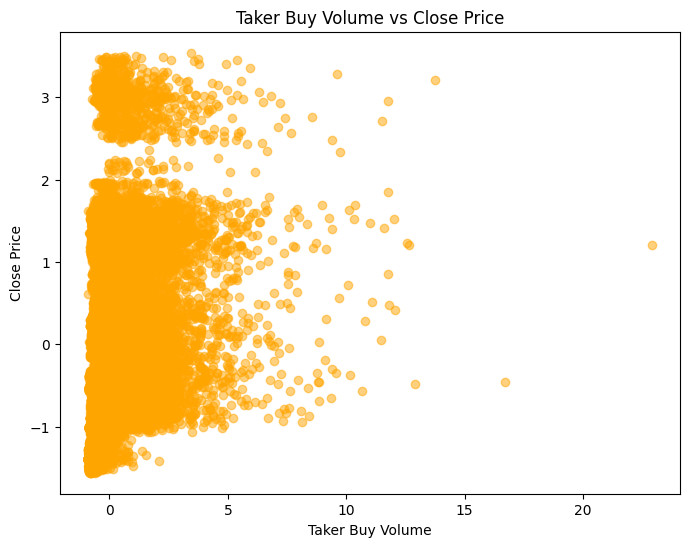

In [196]:
plt.figure(figsize=(8, 6))
plt.scatter(finance_data['taker_buy_volume'], finance_data['close_price'], alpha=0.5, color='orange')
plt.title('Taker Buy Volume vs Close Price')
plt.xlabel('Taker Buy Volume')
plt.ylabel('Close Price')
plt.show()

Intercept: 1.2261517316895244e-16
Coefficient for Difficulty: 0.29731396249275255


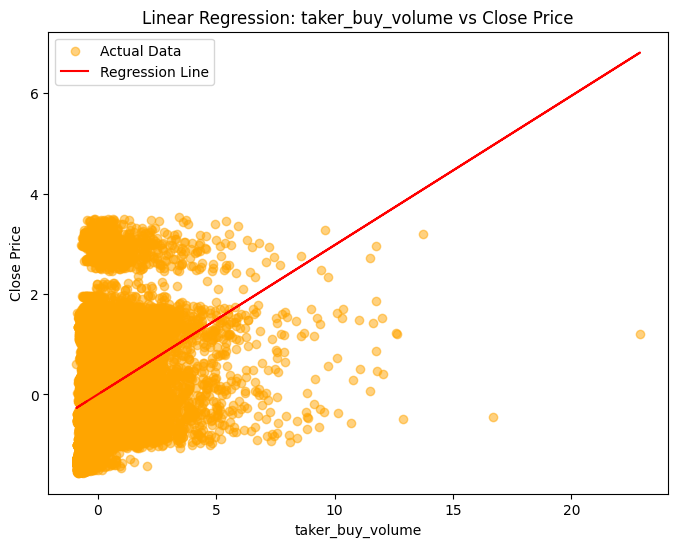

In [202]:
from sklearn.linear_model import LinearRegression

X = finance_data[['taker_buy_volume']]
y = finance_data['close_price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient for Difficulty:", model.coef_[0])

finance_data['predicted_close_price'] = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(finance_data['taker_buy_volume'], finance_data['close_price'], alpha=0.5, label='Actual Data', color='orange')
plt.plot(finance_data['taker_buy_volume'], finance_data['predicted_close_price'], color='red', label='Regression Line')
plt.title('Linear Regression: taker_buy_volume vs Close Price')
plt.xlabel('taker_buy_volume')
plt.ylabel('Close Price')
plt.legend()
plt.show()


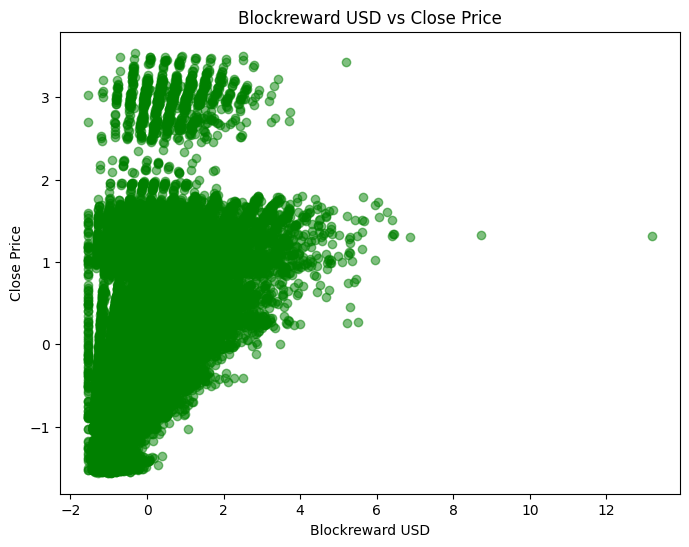

In [199]:
plt.figure(figsize=(8, 6))
plt.scatter(finance_data['blockreward_usd'], finance_data['close_price'], alpha=0.5, color='green')
plt.title('Blockreward USD vs Close Price')
plt.xlabel('Blockreward USD')
plt.ylabel('Close Price')
plt.show()

Intercept: -3.050243341677137e-17
Coefficient for Difficulty: 0.561912158545363


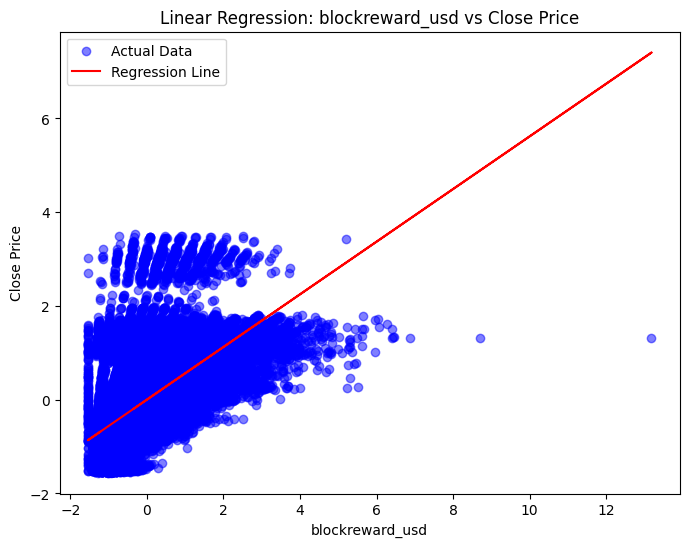

In [203]:
from sklearn.linear_model import LinearRegression

X = finance_data[['blockreward_usd']]
y = finance_data['close_price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient for Difficulty:", model.coef_[0])

finance_data['predicted_close_price'] = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(finance_data['blockreward_usd'], finance_data['close_price'], alpha=0.5, label='Actual Data', color='blue')
plt.plot(finance_data['blockreward_usd'], finance_data['predicted_close_price'], color='red', label='Regression Line')
plt.title('Linear Regression: blockreward_usd vs Close Price')
plt.xlabel('blockreward_usd')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [204]:
difficulty_threshold = 2  
miner_supply_threshold = finance_data['miner_supply_ratio'].mean()  

above_difficulty = finance_data[finance_data['difficulty'] > difficulty_threshold]
below_difficulty = finance_data[finance_data['difficulty'] <= difficulty_threshold]

above_miner_supply = finance_data[finance_data['miner_supply_ratio'] > miner_supply_threshold]
below_miner_supply = finance_data[finance_data['miner_supply_ratio'] <= miner_supply_threshold]

print("Difficulty Threshold Analysis:")
print("Above Threshold Avg Close Price:", above_difficulty['close_price'].mean())
print("Below Threshold Avg Close Price:", below_difficulty['close_price'].mean())

print("\nMiner Supply Ratio Threshold Analysis:")
print("Above Threshold Avg Close Price:", above_miner_supply['close_price'].mean())
print("Below Threshold Avg Close Price:", below_miner_supply['close_price'].mean())


Difficulty Threshold Analysis:
Above Threshold Avg Close Price: 2.5129945861629803
Below Threshold Avg Close Price: -0.08527752208376452

Miner Supply Ratio Threshold Analysis:
Above Threshold Avg Close Price: -0.298746599633926
Below Threshold Avg Close Price: 0.38265311409635167


Low Difficulty Segment Coefficient: 0.5383137590972802
High Difficulty Segment Coefficient: 4.431418319946328


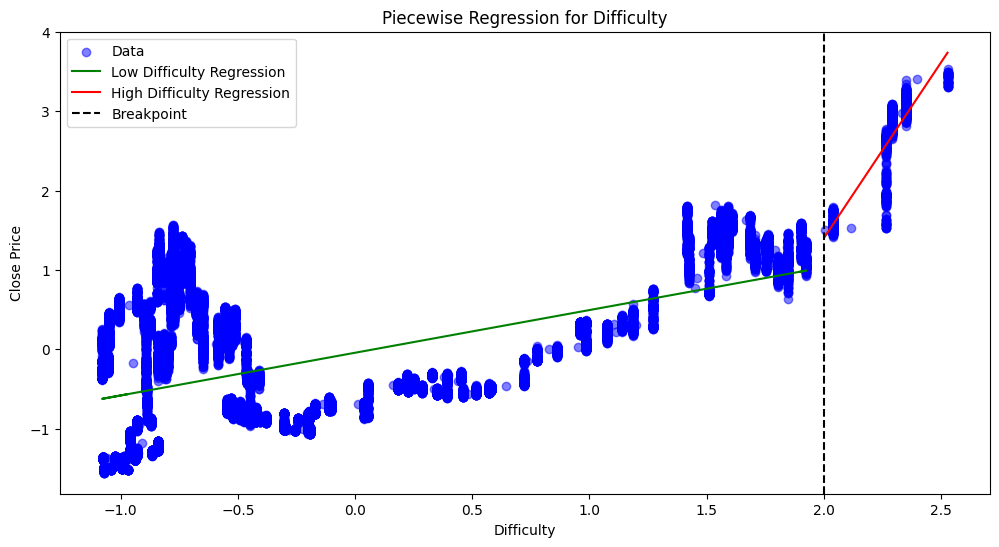

In [205]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define a breakpoint for difficulty (e.g., at 2)
breakpoint = 2

# Create two subsets of data based on the breakpoint
low_difficulty = finance_data[finance_data['difficulty'] <= breakpoint]
high_difficulty = finance_data[finance_data['difficulty'] > breakpoint]

# Fit separate linear regression models
low_model = LinearRegression()
high_model = LinearRegression()

low_X = low_difficulty[['difficulty']]
low_y = low_difficulty['close_price']

high_X = high_difficulty[['difficulty']]
high_y = high_difficulty['close_price']

low_model.fit(low_X, low_y)
high_model.fit(high_X, high_y)

# Print regression results
print("Low Difficulty Segment Coefficient:", low_model.coef_[0])
print("High Difficulty Segment Coefficient:", high_model.coef_[0])

# Plot the piecewise regression
plt.figure(figsize=(12, 6))
plt.scatter(finance_data['difficulty'], finance_data['close_price'], alpha=0.5, label='Data', color='blue')
plt.plot(low_X, low_model.predict(low_X), color='green', label='Low Difficulty Regression')
plt.plot(high_X, high_model.predict(high_X), color='red', label='High Difficulty Regression')
plt.axvline(breakpoint, color='black', linestyle='--', label='Breakpoint')
plt.title('Piecewise Regression for Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [207]:
from ruptures import Binseg

signal = finance_data[['difficulty', 'close_price']].to_numpy()

model = Binseg(model="l2").fit(signal)
breakpoints = model.predict(n_bkps=2)  

print("Detected Breakpoints:", breakpoints)


Detected Breakpoints: [6630, 32175, 41498]


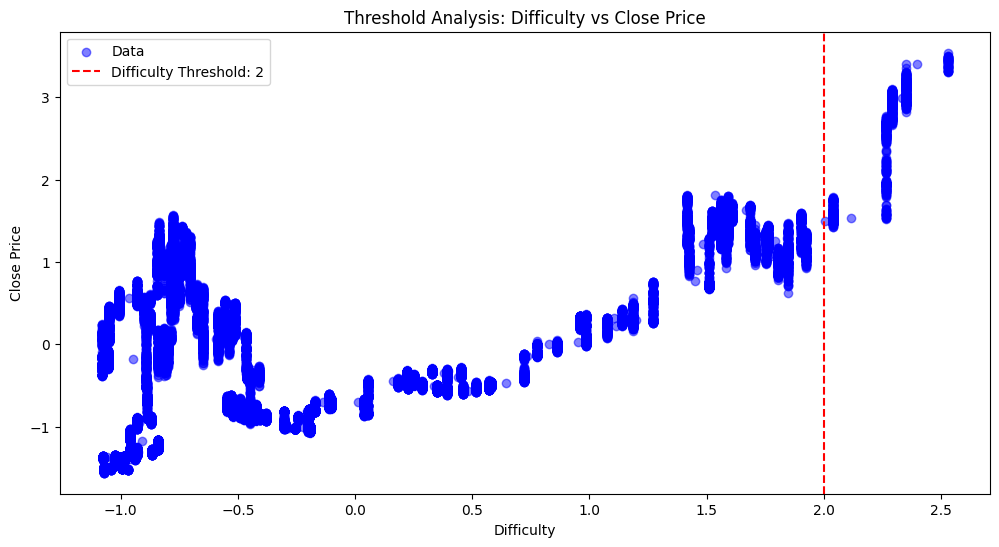

In [208]:
plt.figure(figsize=(12, 6))
plt.scatter(finance_data['difficulty'], finance_data['close_price'], alpha=0.5, label='Data', color='blue')
plt.axvline(difficulty_threshold, color='red', linestyle='--', label=f'Difficulty Threshold: {difficulty_threshold}')
plt.title('Threshold Analysis: Difficulty vs Close Price')
plt.xlabel('Difficulty')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Miner Supply Ratio Threshold Analysis:
Above Threshold Avg Close Price: -0.298746599633926
Below Threshold Avg Close Price: 0.38265311409635167


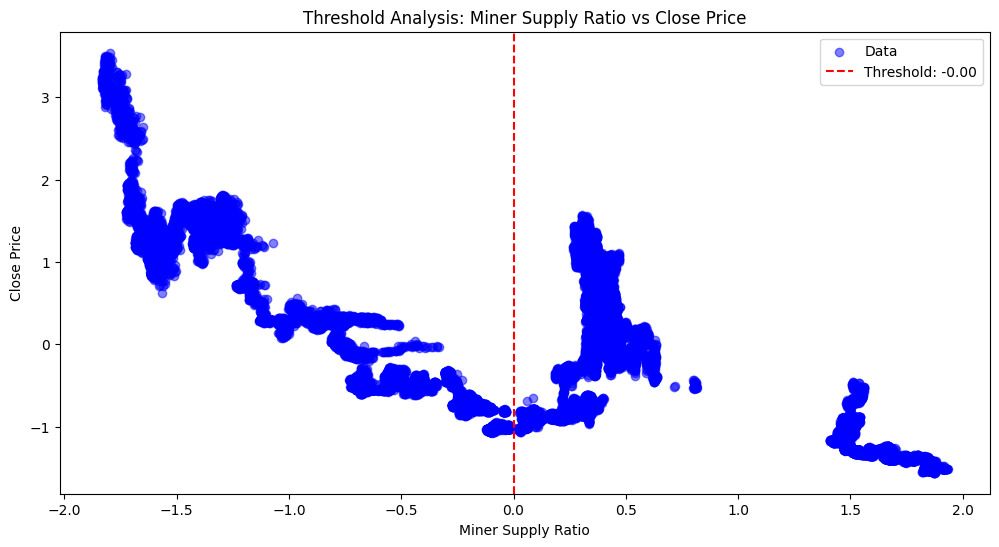

In [209]:
# Define threshold for miner_supply_ratio (mean value as an example)
miner_supply_threshold = finance_data['miner_supply_ratio'].mean()

# Create groups based on the threshold
above_threshold = finance_data[finance_data['miner_supply_ratio'] > miner_supply_threshold]
below_threshold = finance_data[finance_data['miner_supply_ratio'] <= miner_supply_threshold]

# Compare average close_price for each group
print("Miner Supply Ratio Threshold Analysis:")
print("Above Threshold Avg Close Price:", above_threshold['close_price'].mean())
print("Below Threshold Avg Close Price:", below_threshold['close_price'].mean())

# Plot close_price with threshold highlighted
plt.figure(figsize=(12, 6))
plt.scatter(finance_data['miner_supply_ratio'], finance_data['close_price'], alpha=0.5, color='blue', label='Data')
plt.axvline(miner_supply_threshold, color='red', linestyle='--', label=f'Threshold: {miner_supply_threshold:.2f}')
plt.title('Threshold Analysis: Miner Supply Ratio vs Close Price')
plt.xlabel('Miner Supply Ratio')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Low Segment Coefficient: -1.7643911041462281
High Segment Coefficient: -0.9591967816637255


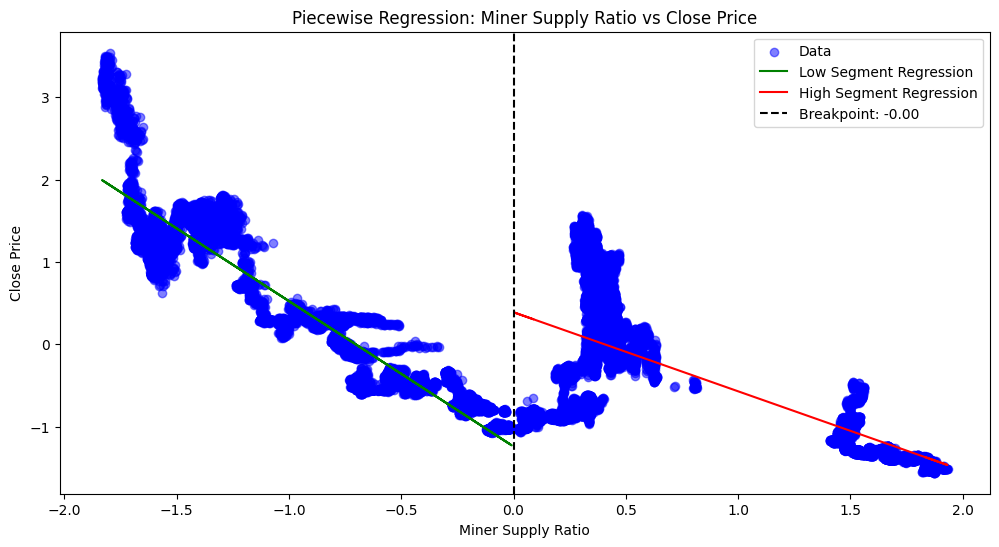

In [210]:
from sklearn.linear_model import LinearRegression

# Define a breakpoint (example: mean value)
breakpoint = finance_data['miner_supply_ratio'].mean()

# Split data into two segments based on the breakpoint
low_segment = finance_data[finance_data['miner_supply_ratio'] <= breakpoint]
high_segment = finance_data[finance_data['miner_supply_ratio'] > breakpoint]

# Fit separate regression models for each segment
low_model = LinearRegression()
high_model = LinearRegression()

low_X = low_segment[['miner_supply_ratio']]
low_y = low_segment['close_price']

high_X = high_segment[['miner_supply_ratio']]
high_y = high_segment['close_price']

low_model.fit(low_X, low_y)
high_model.fit(high_X, high_y)

# Print regression results
print("Low Segment Coefficient:", low_model.coef_[0])
print("High Segment Coefficient:", high_model.coef_[0])

# Plot piecewise regression
plt.figure(figsize=(12, 6))
plt.scatter(finance_data['miner_supply_ratio'], finance_data['close_price'], alpha=0.5, color='blue', label='Data')
plt.plot(low_X, low_model.predict(low_X), color='green', label='Low Segment Regression')
plt.plot(high_X, high_model.predict(high_X), color='red', label='High Segment Regression')
plt.axvline(breakpoint, color='black', linestyle='--', label=f'Breakpoint: {breakpoint:.2f}')
plt.title('Piecewise Regression: Miner Supply Ratio vs Close Price')
plt.xlabel('Miner Supply Ratio')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Detected Breakpoints: [6680, 32370, 41498]


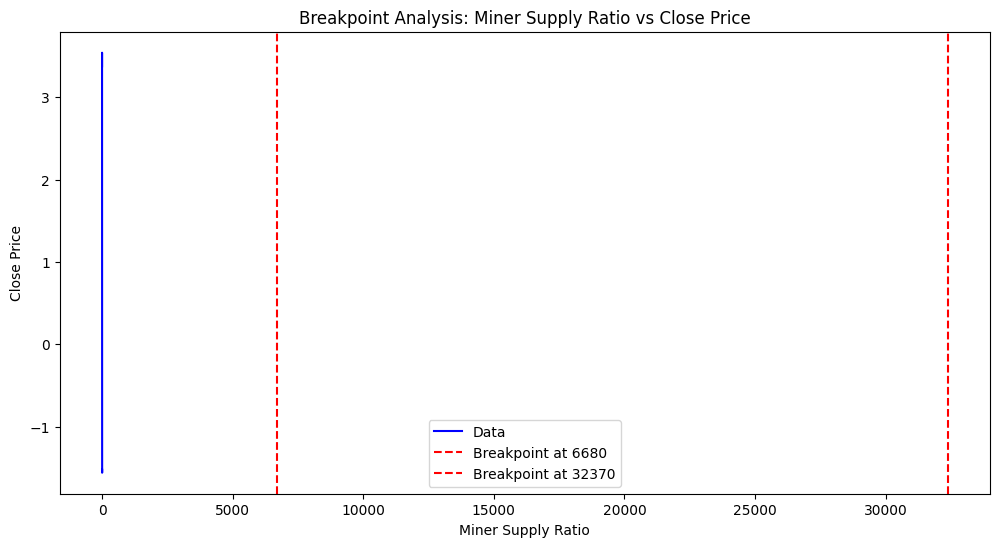

In [211]:
from ruptures import Binseg

# Prepare miner_supply_ratio and close_price as a time series
signal = finance_data[['miner_supply_ratio', 'close_price']].to_numpy()

# Detect breakpoints using binary segmentation
model = Binseg(model="l2").fit(signal)
breakpoints = model.predict(n_bkps=2)  # Specify the number of breakpoints

print("Detected Breakpoints:", breakpoints)

# Plot detected breakpoints
plt.figure(figsize=(12, 6))
plt.plot(finance_data['miner_supply_ratio'], finance_data['close_price'], label='Data', color='blue')
for bp in breakpoints[:-1]:  # Exclude the last breakpoint (end of data)
    plt.axvline(bp, color='red', linestyle='--', label=f'Breakpoint at {bp}')
plt.title('Breakpoint Analysis: Miner Supply Ratio vs Close Price')
plt.xlabel('Miner Supply Ratio')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [216]:
selected_data = finance_data[['difficulty', 'taker_buy_volume', 'blockreward_usd', 'close_price']].dropna()

X = selected_data[['difficulty', 'taker_buy_volume', 'blockreward_usd']]
y = selected_data['close_price']

#Split into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Intercept:", linear_model.intercept_)
print("Coefficients:", dict(zip(X.columns, linear_model.coef_)))
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Linear Regression Results:
Intercept: -0.000254699597113638
Coefficients: {'difficulty': np.float64(0.5370914951389283), 'taker_buy_volume': np.float64(0.13069739848177586), 'blockreward_usd': np.float64(0.43828848172990287)}
Mean Squared Error (MSE): 0.3757211097171112
R-squared (R²): 0.6311952914982172


In [221]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R²):", r2_rf)


Random Forest Results:
Mean Squared Error (MSE): 0.009400388322936453
R-squared (R²): 0.9907726572034921


In [232]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R²):", r2_gb)


Gradient Boosting Results:
Mean Squared Error (MSE): 0.046626225145128715
R-squared (R²): 0.9542320861712164


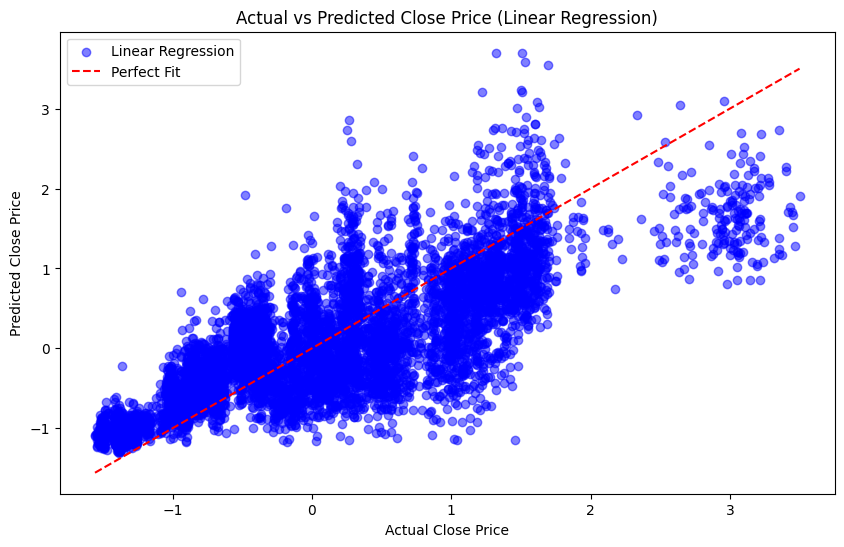

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Close Price (Linear Regression)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()


In [ ]:
# Extract coefficients and their corresponding features
coefficients = linear_model.coef_
importance_df_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df_lr['Feature'], importance_df_lr['Coefficient'], color='green')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Close Price (Random Forest)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()


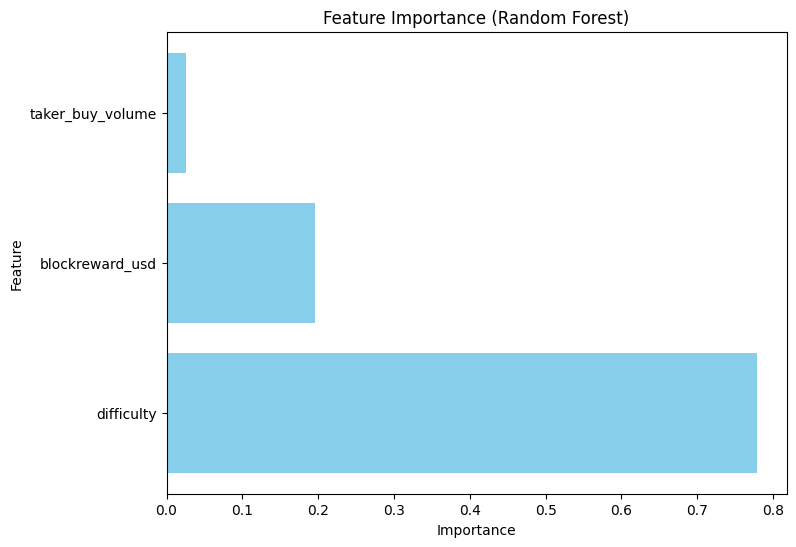

In [225]:
# Get feature importance from Random Forest
importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


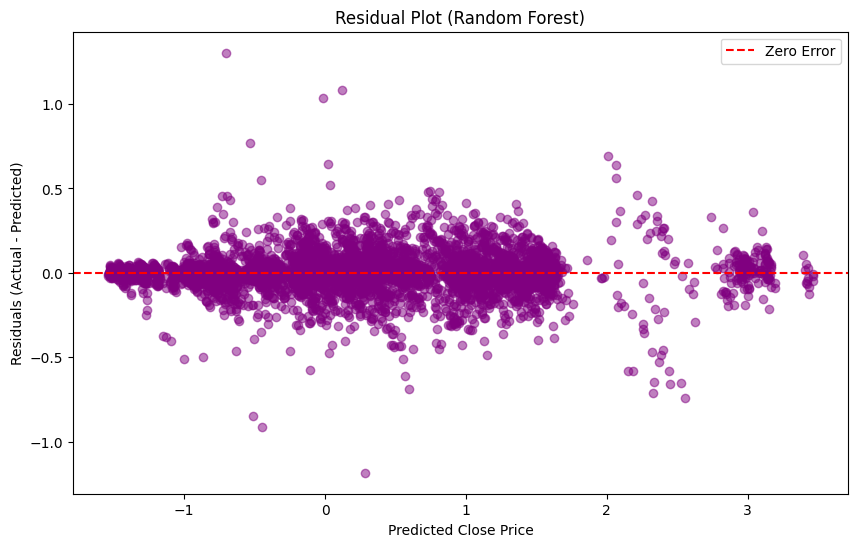

In [226]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()


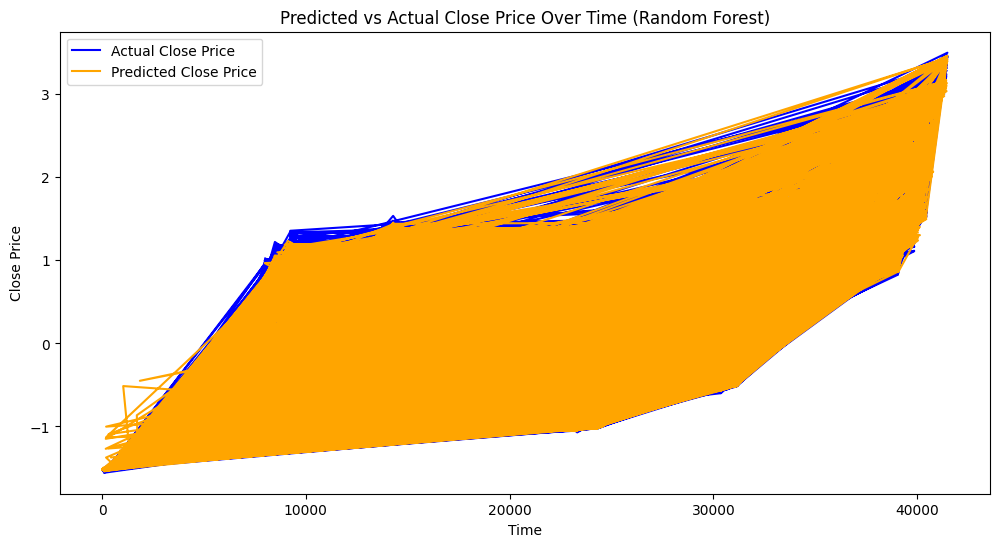

In [227]:
# Assuming 'time' is available in the dataset
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted Close Price', color='orange')
plt.title('Predicted vs Actual Close Price Over Time (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


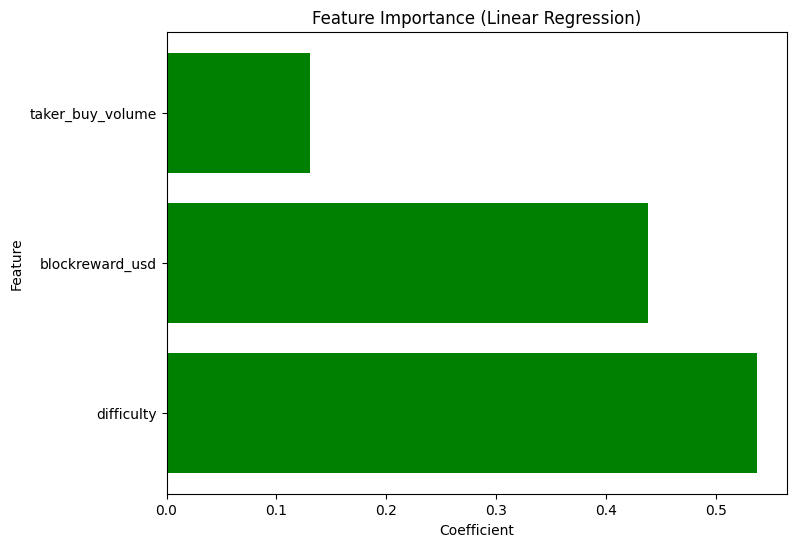

In [229]:
# Extract coefficients and their corresponding features
coefficients = linear_model.coef_
importance_df_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df_lr['Feature'], importance_df_lr['Coefficient'], color='green')
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


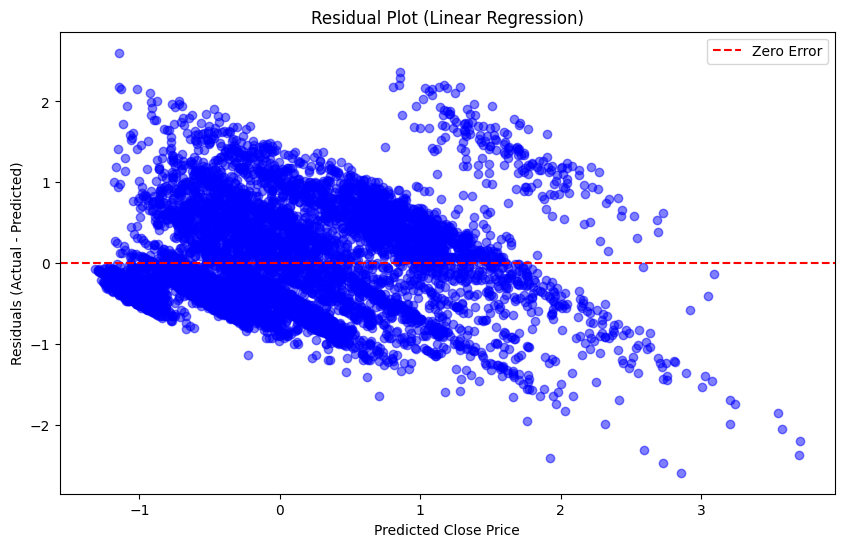

In [230]:
# Calculate residuals for Linear Regression
residuals_lr = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_lr, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()


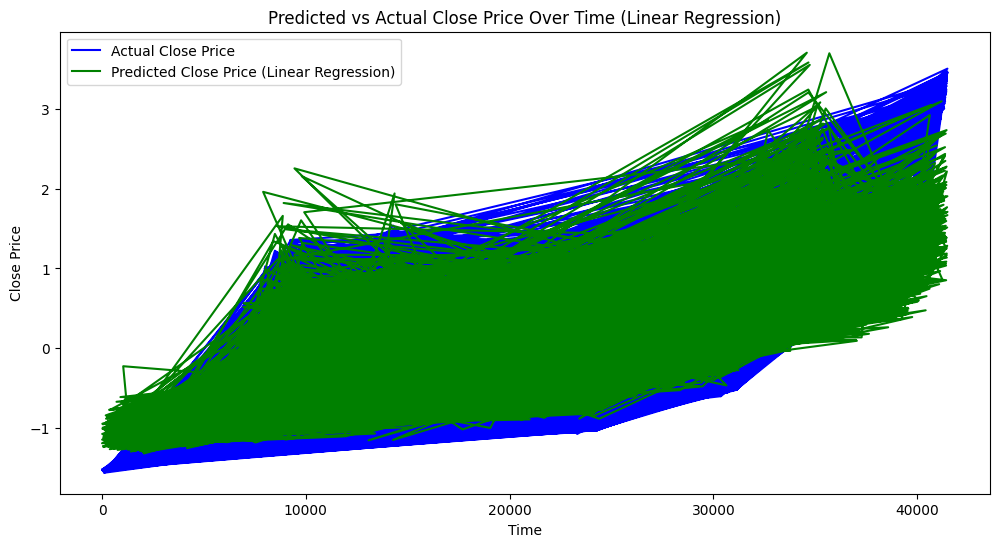

In [231]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price (Linear Regression)', color='green')
plt.title('Predicted vs Actual Close Price Over Time (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


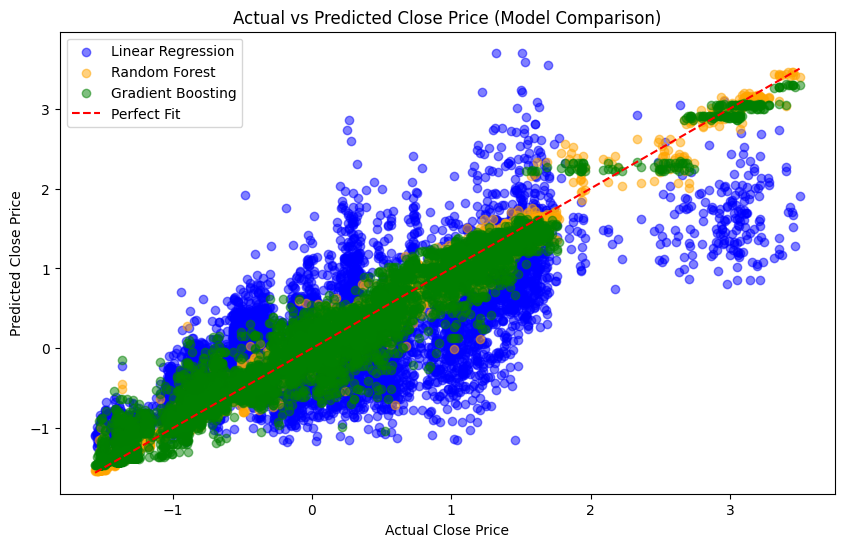

In [234]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression', color='blue')

# Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='orange')

# Gradient Boosting
plt.scatter(y_test, y_pred_gb, alpha=0.5, label='Gradient Boosting', color='green')

# Perfect Fit Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.title('Actual vs Predicted Close Price (Model Comparison)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()


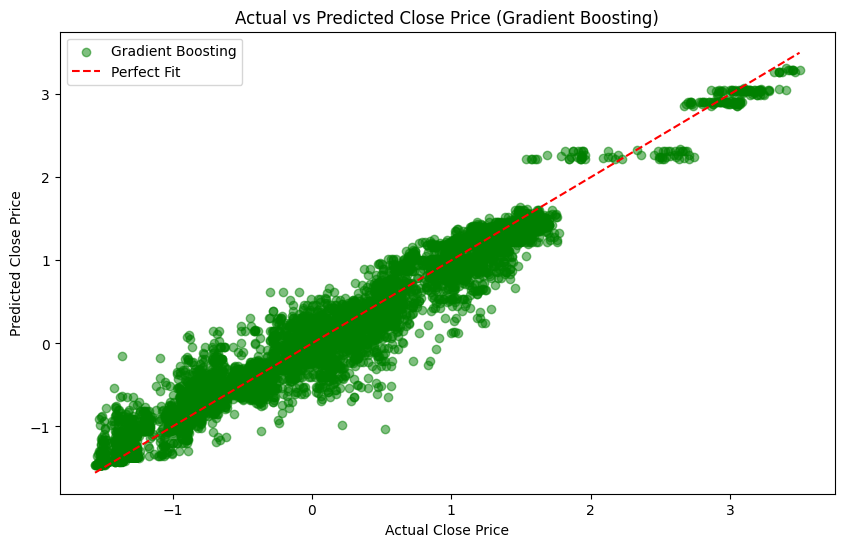

In [233]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, label='Gradient Boosting', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Close Price (Gradient Boosting)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()


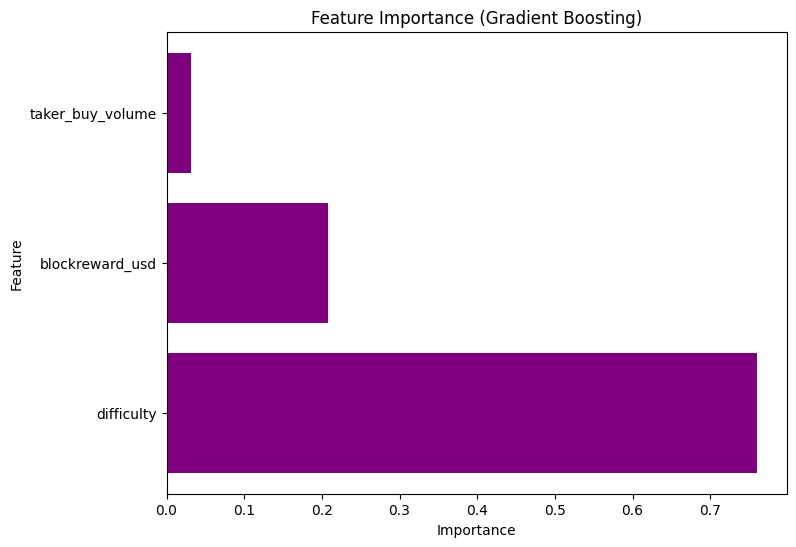

In [235]:
# Extract feature importance from Gradient Boosting model
importance_gb = gb_model.feature_importances_
importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': importance_gb}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df_gb['Feature'], importance_df_gb['Importance'], color='purple')
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


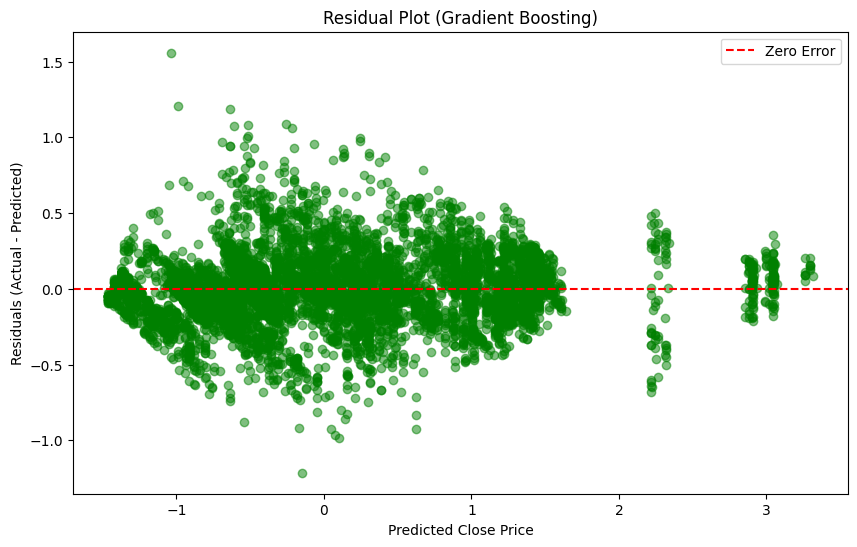

In [236]:
# Calculate residuals for Gradient Boosting
residuals_gb = y_test - y_pred_gb

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, residuals_gb, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Plot (Gradient Boosting)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()


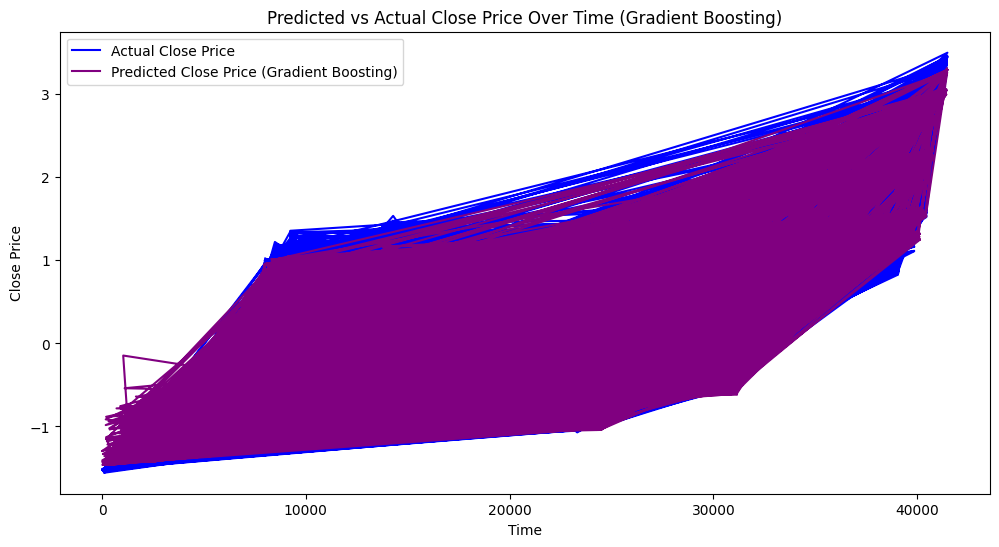

In [238]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred_gb, label='Predicted Close Price (Gradient Boosting)', color='purple')
plt.title('Predicted vs Actual Close Price Over Time (Gradient Boosting)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


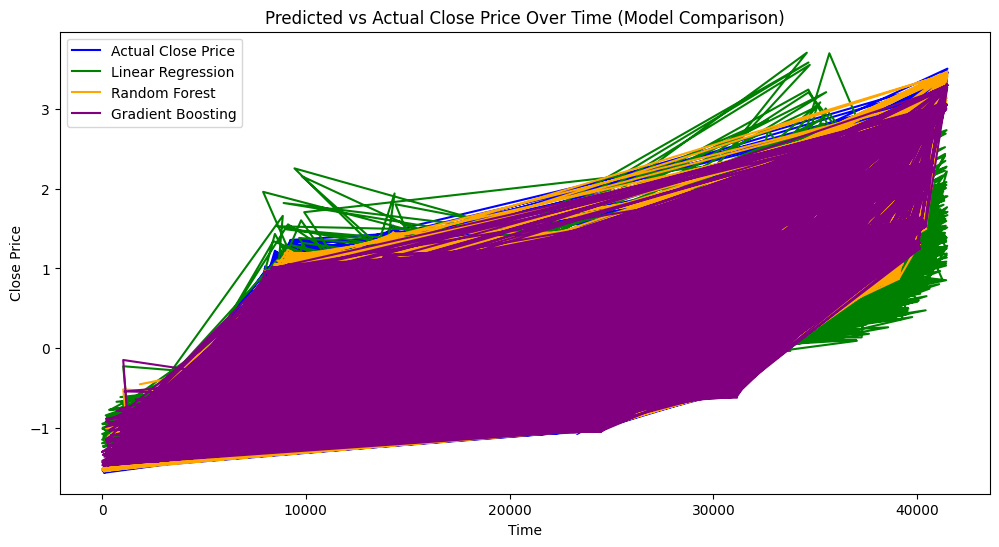

In [239]:
plt.figure(figsize=(12, 6))

# Actual values
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')

# Linear Regression
plt.plot(y_test.index, y_pred, label='Linear Regression', color='green')

# Random Forest
plt.plot(y_test.index, y_pred_rf, label='Random Forest', color='orange')

# Gradient Boosting
plt.plot(y_test.index, y_pred_gb, label='Gradient Boosting', color='purple')

plt.title('Predicted vs Actual Close Price Over Time (Model Comparison)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


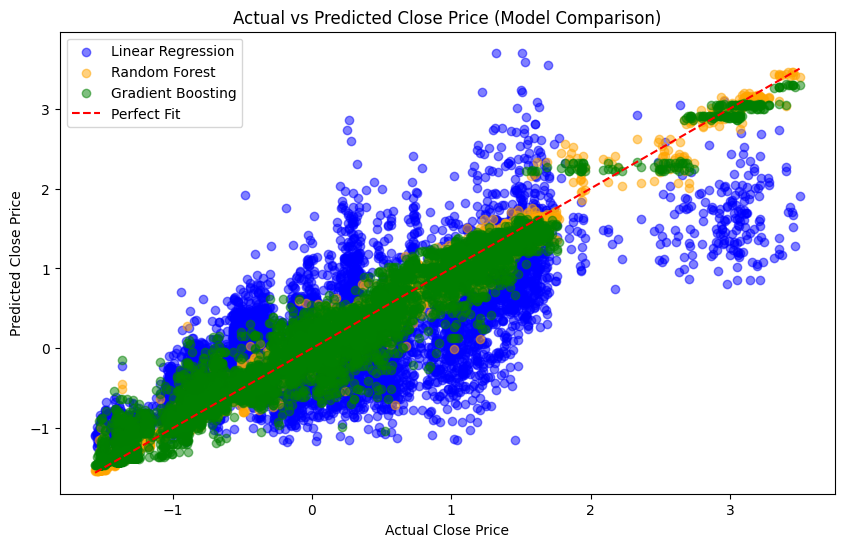

In [240]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression', color='blue')

# Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='orange')

# Gradient Boosting
plt.scatter(y_test, y_pred_gb, alpha=0.5, label='Gradient Boosting', color='green')

# Perfect Fit Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.title('Actual vs Predicted Close Price (Model Comparison)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()


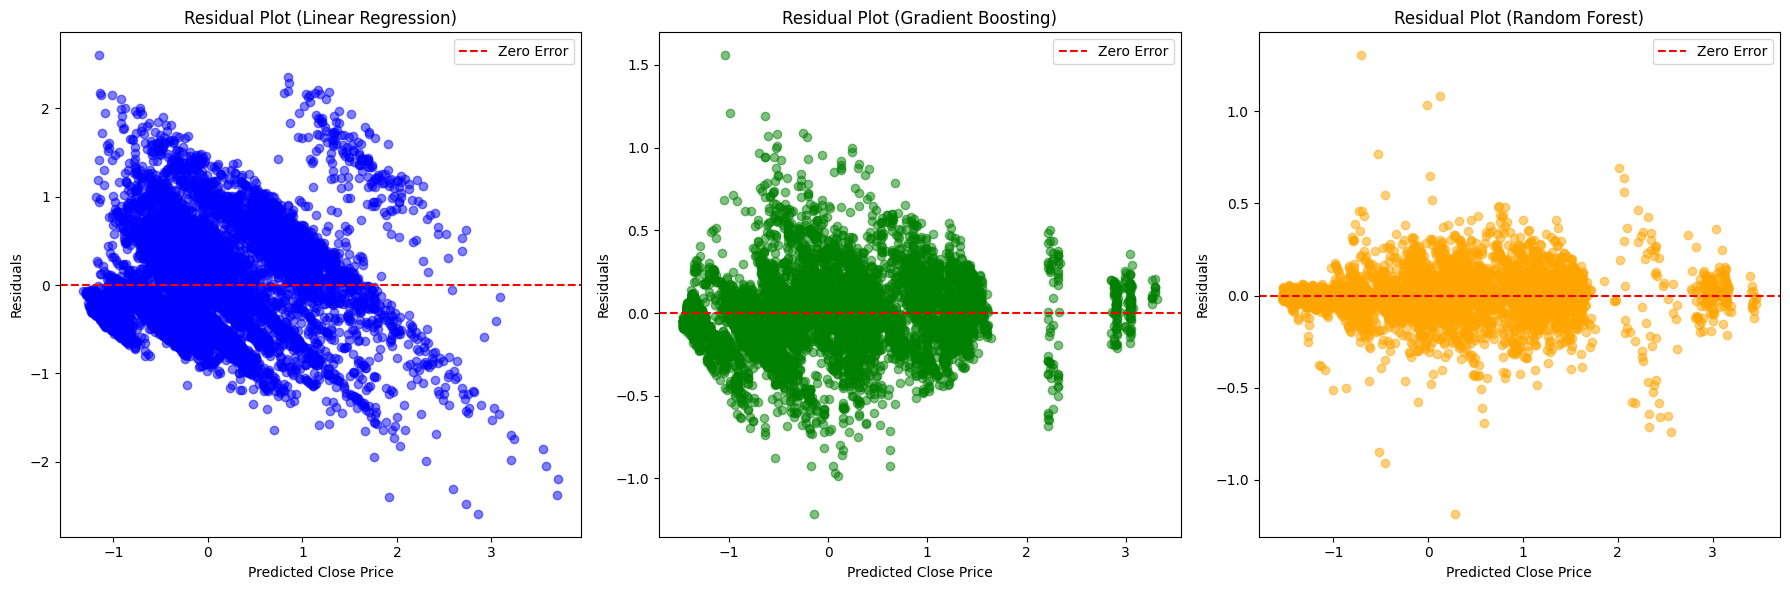

In [242]:
plt.figure(figsize=(18, 6))  # Adjust the width for three subplots

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_pred, residuals_lr, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.legend()

# Gradient Boosting
plt.subplot(1, 3, 2)
plt.scatter(y_pred_gb, residuals_gb, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Plot (Gradient Boosting)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.legend()

# Random Forest
residuals_rf = y_test - y_pred_rf  # Calculate residuals for Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()  # Ensure proper spacing
plt.show()
